In [101]:
import pandas as pd
import numpy as np
import ast
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import (datasets, decomposition, ensemble, 
                     metrics, model_selection, preprocessing, cluster)
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import pickle
from scipy import stats
import sys
from numpy import unique
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn.mixture import BayesianGaussianMixture

sys.path.insert(0, '../Service/')

from DataPreprocessingService import *
seed = 42
np.random.seed(seed)

In [102]:
dataframe = pd.read_csv("../Data/data_v2.csv")

In [103]:
dataframe

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles
0,b87deed5-f1e4-4424-855a-bf0fec8a81b1,2dust_v2rayN,0,18,1041,82,11,17643,2632,473,...,0,24,"[10, 0, 5, 0, 1, 0, 0, 1, 24, 1, 0, 3, 1, 0, 0...",22,326,"[4, 12, 1, 18, 46, 19, 12, 0, 16, 2, 2, 3, 3, ...","[91, 38, 11, 66, 5, 160, 155, 125, 8, 103, 73,...","[0, 49, 0, 12, 6, 38, 10, 5, 0, 0, 0, 0, 0, 1,...","[1.04, 1.72, 1.6, 2.58, 1.55, 13.57, 1.32, 12....",103
1,3817884f-53b8-4455-9368-ec49a6078c63,a-pedroso_CleanArchitecture,0,0,24,2,1,1713,36,48,...,3,29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,247,"[5, 8, 14, 12, 12, 0, 1, 0, 3, 5, 2, 6, 5, 2, ...","[18, 25, 38, 28, 28, 8, 21, 17, 5, 6, 6, 19, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.75, 1.63, 2.17, 1.45, 0.0, 6.22, 1.24, 0.44...",64
2,50cf1905-efde-4cd5-8a77-e9b09298923b,AbdullahOztuurkk_CleanArchitecture,0,0,7,1,0,1497,100,32,...,1,40,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,241,"[3, 12, 20, 20, 20, 13, 4, 11, 10, 7, 7, 10, 1...","[24, 55, 52, 53, 34, 37, 20, 36, 37, 27, 28, 3...","[0, 3, 19, 19, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[7.73, 7.58, 0.35, 8.28, 9.98, 1.08, 85.49, 0....",46
3,1551ba42-5ec0-4569-94d9-ec89df3706ab,Adnatull_Clean-Architecture,0,0,82,17,0,6313,361,109,...,10,72,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,552,"[0, 5, 16, 3, 12, 14, 4, 15, 13, 33, 45, 0, 2,...","[6, 18, 47, 14, 32, 39, 15, 35, 57, 107, 200, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[34.72, 40.18, 0.89, 2.03, 0.75, 5.96, 3.7, 3....",154
4,533dc95d-eebe-4157-a51e-5b8788120163,aevitas_CleanTickets,0,1,15,3,0,1010,2,17,...,4,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,111,"[10, 14, 10, 0, 2, 5, 10, 2, 9, 2, 10, 3, 9, 2...","[77, 5, 6, 5, 6, 5, 6, 29, 39, 30, 2, 2, 3, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.38, 78.72, 7.14, 14.47, 7.04, 8.49, 0.31, 8...",53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,f5a6d797-4fcd-4963-a473-0eba5767f6c2,Yu-Core_SwashbucklerDiary,0,4,431,33,7,11249,404,518,...,12,127,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,357,"[4, 13, 4, 2, 18, 9, 56, 2, 3, 9, 4, 7, 3, 9, ...","[21, 102, 15, 15, 109, 44, 281, 20, 12, 29, 24...","[0, 5, 0, 2, 3, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.79, 1.95, 1.42, 0.97, 2.51, 1.31, 6.41, 3.7...",235
596,b0197398-d6ce-4d58-91cc-139e9e48d109,ZacMarcus_YahooFinance.NET,2,0,6,2,0,442,42,20,...,0,0,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,13,"[74, 8, 1, 1, 1, 7, 12]","[60, 200, 9, 14, 18, 15, 37, 74, 15]","[4, 2, 0, 0, 0, 18, 0, 1, 17]","[8.87, 9.72, 27.62, 8.5, 28.55, 9.3, 42.31, 4....",9
597,3aad8b4e-c419-4d56-857e-f2ae0f077f65,zaranetCore_IdentityServer_SSO,7,0,3,0,0,460,16,17,...,2,7,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ...",0,84,"[0, 0, 7, 0, 3, 8, 13, 10, 2, 4, 12, 0, 12, 2,...","[7, 10, 46, 11, 22, 49, 58, 41, 11, 20, 20, 7,...","[0, 0, 0, 0, 0, 1, 2, 5, 0, 0, 8, 0, 0, 0, 0, ...","[0.4, 4.3, 8.53, 8.96, 0.0, 3.57, 3.85, 4.22, ...",19
598,a769210a-960c-4211-ad47-739e7edfe7c7,Zimmergren_dotnet-core-aci-demo,3,0,2,2,3,156,37,8,...,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,11,"[8, 43, 3]","[45, 76, 35]","[0, 35, 2]","[0.0, 47.24, 63.21, 12.47, 54.87, 100.0, 7.75,...",3


In [104]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Project_ID               600 non-null    object 
 1   Project_Name             600 non-null    object 
 2   EndOfLifeFramework       600 non-null    float64
 3   ForFrequency             600 non-null    float64
 4   IfFrequency              600 non-null    float64
 5   ForEachFrequency         600 non-null    float64
 6   WhileFrequency           600 non-null    float64
 7   CodeLines                600 non-null    float64
 8   CommentLines             600 non-null    float64
 9   MethodNumber             600 non-null    float64
 10  ClassNumber              600 non-null    float64
 11  InterfaceNumber          600 non-null    float64
 12  InheritanceDeclarations  600 non-null    float64
 13  ExternalAPICalls         600 non-null    object 
 14  HttpClientCalls          6

In [105]:
pd.set_option('display.float_format', lambda x: format(x, '.0f'))
dataframe.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,4,35,763,79,16,23111,3934,676,328,15,176,1899,883,256
std,8,170,2892,269,63,85410,14324,2017,829,37,504,45640,2405,603
min,0,0,0,0,0,11,0,0,1,0,0,-1,0,1
25%,0,0,16,1,0,1237,43,34,31,1,12,0,90,34
50%,1,0,67,7,1,3826,254,104,86,4,40,0,254,84
75%,5,6,260,34,5,12104,1542,352,236,11,119,2,699,214
max,66,2135,35665,2802,758,1498515,211030,26617,11528,380,7926,1117948,31518,8452


Removing duplicates that could be present from the ETL process

In [106]:
dataframe.drop_duplicates(subset=dataframe.loc[:, dataframe.columns != 'Project_ID'])

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles
0,b87deed5-f1e4-4424-855a-bf0fec8a81b1,2dust_v2rayN,0,18,1041,82,11,17643,2632,473,...,0,24,"[10, 0, 5, 0, 1, 0, 0, 1, 24, 1, 0, 3, 1, 0, 0...",22,326,"[4, 12, 1, 18, 46, 19, 12, 0, 16, 2, 2, 3, 3, ...","[91, 38, 11, 66, 5, 160, 155, 125, 8, 103, 73,...","[0, 49, 0, 12, 6, 38, 10, 5, 0, 0, 0, 0, 0, 1,...","[1.04, 1.72, 1.6, 2.58, 1.55, 13.57, 1.32, 12....",103
1,3817884f-53b8-4455-9368-ec49a6078c63,a-pedroso_CleanArchitecture,0,0,24,2,1,1713,36,48,...,3,29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,247,"[5, 8, 14, 12, 12, 0, 1, 0, 3, 5, 2, 6, 5, 2, ...","[18, 25, 38, 28, 28, 8, 21, 17, 5, 6, 6, 19, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.75, 1.63, 2.17, 1.45, 0.0, 6.22, 1.24, 0.44...",64
2,50cf1905-efde-4cd5-8a77-e9b09298923b,AbdullahOztuurkk_CleanArchitecture,0,0,7,1,0,1497,100,32,...,1,40,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,241,"[3, 12, 20, 20, 20, 13, 4, 11, 10, 7, 7, 10, 1...","[24, 55, 52, 53, 34, 37, 20, 36, 37, 27, 28, 3...","[0, 3, 19, 19, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[7.73, 7.58, 0.35, 8.28, 9.98, 1.08, 85.49, 0....",46
3,1551ba42-5ec0-4569-94d9-ec89df3706ab,Adnatull_Clean-Architecture,0,0,82,17,0,6313,361,109,...,10,72,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,552,"[0, 5, 16, 3, 12, 14, 4, 15, 13, 33, 45, 0, 2,...","[6, 18, 47, 14, 32, 39, 15, 35, 57, 107, 200, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[34.72, 40.18, 0.89, 2.03, 0.75, 5.96, 3.7, 3....",154
4,533dc95d-eebe-4157-a51e-5b8788120163,aevitas_CleanTickets,0,1,15,3,0,1010,2,17,...,4,20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,111,"[10, 14, 10, 0, 2, 5, 10, 2, 9, 2, 10, 3, 9, 2...","[77, 5, 6, 5, 6, 5, 6, 29, 39, 30, 2, 2, 3, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.38, 78.72, 7.14, 14.47, 7.04, 8.49, 0.31, 8...",53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,f5a6d797-4fcd-4963-a473-0eba5767f6c2,Yu-Core_SwashbucklerDiary,0,4,431,33,7,11249,404,518,...,12,127,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,357,"[4, 13, 4, 2, 18, 9, 56, 2, 3, 9, 4, 7, 3, 9, ...","[21, 102, 15, 15, 109, 44, 281, 20, 12, 29, 24...","[0, 5, 0, 2, 3, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.79, 1.95, 1.42, 0.97, 2.51, 1.31, 6.41, 3.7...",235
596,b0197398-d6ce-4d58-91cc-139e9e48d109,ZacMarcus_YahooFinance.NET,2,0,6,2,0,442,42,20,...,0,0,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,13,"[74, 8, 1, 1, 1, 7, 12]","[60, 200, 9, 14, 18, 15, 37, 74, 15]","[4, 2, 0, 0, 0, 18, 0, 1, 17]","[8.87, 9.72, 27.62, 8.5, 28.55, 9.3, 42.31, 4....",9
597,3aad8b4e-c419-4d56-857e-f2ae0f077f65,zaranetCore_IdentityServer_SSO,7,0,3,0,0,460,16,17,...,2,7,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ...",0,84,"[0, 0, 7, 0, 3, 8, 13, 10, 2, 4, 12, 0, 12, 2,...","[7, 10, 46, 11, 22, 49, 58, 41, 11, 20, 20, 7,...","[0, 0, 0, 0, 0, 1, 2, 5, 0, 0, 8, 0, 0, 0, 0, ...","[0.4, 4.3, 8.53, 8.96, 0.0, 3.57, 3.85, 4.22, ...",19
598,a769210a-960c-4211-ad47-739e7edfe7c7,Zimmergren_dotnet-core-aci-demo,3,0,2,2,3,156,37,8,...,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,11,"[8, 43, 3]","[45, 76, 35]","[0, 35, 2]","[0.0, 47.24, 63.21, 12.47, 54.87, 100.0, 7.75,...",3


# Data Exploration

In [107]:
dfcopy = dataframe.copy()

Getting the max global boundaries of the list columns

In [108]:
print("ClassCouplingListing " + repr(global_boundaries(dfcopy['ClassCouplingListing'])))
print("CodeSimilarity " + repr(global_boundaries(dfcopy['CodeSimilarity'])))
print("CodeLinesPerFile " + repr(global_boundaries(dfcopy['CodeLinesPerFile'])))
print("CommentLinesPerFile " + repr(global_boundaries(dfcopy['CommentLinesPerFile'])))

ClassCouplingListing (6857, 0)


CodeSimilarity (100, 0)
CodeLinesPerFile (203174, 0)
CommentLinesPerFile (47801, 0)


In [109]:
def get_boundaries(lower, higher, numberOfBins):
    boundaries = np.linspace(lower, higher, numberOfBins)
    boundaries[-1] = np.inf
    return boundaries

For CodeSimilarity, ClassCouplingListing, CodeLinesPerFile and CommentLinesPerFile, bins were made, the last bin contains all values between the previous and infinity such that all data is grouped 

In [110]:
def get_histogram_of_list_values(data):
    flat_values = [item for sublist in data for item in sublist]
    plt.hist(flat_values, edgecolor='black')

In [111]:
def boundaries_splitting(column, boundaries, column_name):
    for i in range(len(boundaries) - 1):
        bin_name = f'{column_name}_{boundaries[i]}_{boundaries[i + 1]}'
        dfcopy[bin_name] = column.apply(
            lambda x: sum(boundaries[i] <= value < boundaries[i + 1] for value in np.atleast_1d(x)))

In [112]:
type(dfcopy)

pandas.core.frame.DataFrame

In [113]:
columns = ['CodeSimilarity', 'ClassCouplingListing', 'CodeLinesPerFile', 'CommentLinesPerFile', 'ExternalAPICalls']
dfcopy = handle_list_to_median(columns, dfcopy)

C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [114]:
dfcopy.head(10)

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,ExternalAPICalls_Median
0,b87deed5-f1e4-4424-855a-bf0fec8a81b1,2dust_v2rayN,0,18,1041,82,11,17643,2632,473,...,"[4, 12, 1, 18, 46, 19, 12, 0, 16, 2, 2, 3, 3, ...","[91, 38, 11, 66, 5, 160, 155, 125, 8, 103, 73,...","[0, 49, 0, 12, 6, 38, 10, 5, 0, 0, 0, 0, 0, 1,...","[1.04, 1.72, 1.6, 2.58, 1.55, 13.57, 1.32, 12....",103,11,8,82,1,0
1,3817884f-53b8-4455-9368-ec49a6078c63,a-pedroso_CleanArchitecture,0,0,24,2,1,1713,36,48,...,"[5, 8, 14, 12, 12, 0, 1, 0, 3, 5, 2, 6, 5, 2, ...","[18, 25, 38, 28, 28, 8, 21, 17, 5, 6, 6, 19, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.75, 1.63, 2.17, 1.45, 0.0, 6.22, 1.24, 0.44...",64,6,6,22,0,0
2,50cf1905-efde-4cd5-8a77-e9b09298923b,AbdullahOztuurkk_CleanArchitecture,0,0,7,1,0,1497,100,32,...,"[3, 12, 20, 20, 20, 13, 4, 11, 10, 7, 7, 10, 1...","[24, 55, 52, 53, 34, 37, 20, 36, 37, 27, 28, 3...","[0, 3, 19, 19, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[7.73, 7.58, 0.35, 8.28, 9.98, 1.08, 85.49, 0....",46,5,8,28,0,0
3,1551ba42-5ec0-4569-94d9-ec89df3706ab,Adnatull_Clean-Architecture,0,0,82,17,0,6313,361,109,...,"[0, 5, 16, 3, 12, 14, 4, 15, 13, 33, 45, 0, 2,...","[6, 18, 47, 14, 32, 39, 15, 35, 57, 107, 200, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[34.72, 40.18, 0.89, 2.03, 0.75, 5.96, 3.7, 3....",154,15,6,21,0,0
4,533dc95d-eebe-4157-a51e-5b8788120163,aevitas_CleanTickets,0,1,15,3,0,1010,2,17,...,"[10, 14, 10, 0, 2, 5, 10, 2, 9, 2, 10, 3, 9, 2...","[77, 5, 6, 5, 6, 5, 6, 29, 39, 30, 2, 2, 3, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.38, 78.72, 7.14, 14.47, 7.04, 8.49, 0.31, 8...",53,7,6,10,0,0
5,90f4b455-d48e-48d3-8129-0c3f9badcc67,afgalvan_Tilia,8,1,20,1,0,13534,44,248,...,"[7, 9, 4, 4, 13, 5, 1, 1, 13, 10, 10, 9, 4, 16...","[29, 5, 42, 27, 27, 87, 40, 13, 11, 93, 66, 66...","[3, 6, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, ...","[87.38, 3.1, 1.45, 0.06, 0.49, 0.16, 0.15, 4.1...",209,13,5,24,0,0
6,ddfd0398-1f01-4631-80b9-ecfc1443de48,AhmedMoosa_CleanArchitecture-ASPNETCore,3,0,8,0,0,573,19,15,...,"[12, 1, 0, 2, 14, 5, 5, 10, 10, 9, 6, 21, 10, 2]","[34, 18, 12, 12, 12, 12, 11, 12, 15, 20, 22, 2...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 1, ...","[9.12, 0.0, 12.68, 6.37, 8.05, 1.58, 1.04, 6.5...",20,5,8,21,0,0
7,0d8a0485-2fc7-4368-8c98-5066f8b7ad7f,ahmettugur_MinimalApiCleanArchitecture,0,0,37,6,1,4543,20,123,...,"[7, 0, 7, 0, 7, 11, 10, 17, 1, 0, 1, 0, 3, 7, ...","[37, 18, 52, 8, 69, 85, 26, 90, 7, 16, 6, 15, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[7.1, 16.68, 0.5, 0.0, 0.71, 1.37, 0.43, 1.38,...",146,12,7,18,0,0
8,6379c58b-8ed4-4aa3-9da9-42e17b4c0bfa,aksharp_DDD.Light,21,0,54,0,2,3178,487,118,...,"[11, 16, 1, 14, 8, 3, 7, 23, 3, 8, 6, 25, 13, ...","[7, 10, 6, 46, 7, 69, 7, 13, 11, 7, 16, 9, 10,...","[0, 0, 0, 0, 7, 1, 7, 0, 0, 7, 0, 0, 0, 0, 0, ...","[8.66, 6.51, 9.24, 98.7, 4.14, 98.89, 12.05, 1...",139,14,4,15,0,0
9,8ecf893e-f59b-4062-9ead-3b244f689949,alesimoes_hexagonal-clean-architecture,9,0,38,1,0,2780,33,90,...,"[7, 1, 0, 3, 7, 15, 7, 4, 4, 4, 13, 6, 5, 8, 6...","[11, 9, 6, 6, 27, 12, 9, 11, 24, 52, 35, 21, 1...","[0, 10, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,...","[96.61, 91.7, 95.3, 91.82, 89.5, 78.42, 0.29, ...",116,9,3,20,0,0


For ExternalAPICalls json data for each row was extracted into simple lists

In [115]:
def extract_numbers_from_json(json_string):
    try:
        data = json.loads(json_string.replace("'", "\""))
        numbers = [value for value in data if isinstance(value, int)]
        return numbers
    
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
        return []

In [116]:
dfcopy['ExternalAPIExtracted'] = dfcopy['ExternalAPICalls'].apply(extract_numbers_from_json)
dfcopy

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,ExternalAPICalls_Median,ExternalAPIExtracted
0,b87deed5-f1e4-4424-855a-bf0fec8a81b1,2dust_v2rayN,0,18,1041,82,11,17643,2632,473,...,"[91, 38, 11, 66, 5, 160, 155, 125, 8, 103, 73,...","[0, 49, 0, 12, 6, 38, 10, 5, 0, 0, 0, 0, 0, 1,...","[1.04, 1.72, 1.6, 2.58, 1.55, 13.57, 1.32, 12....",103,11,8,82,1,0,"[10, 0, 5, 0, 1, 0, 0, 1, 24, 1, 0, 3, 1, 0, 0..."
1,3817884f-53b8-4455-9368-ec49a6078c63,a-pedroso_CleanArchitecture,0,0,24,2,1,1713,36,48,...,"[18, 25, 38, 28, 28, 8, 21, 17, 5, 6, 6, 19, 6...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.75, 1.63, 2.17, 1.45, 0.0, 6.22, 1.24, 0.44...",64,6,6,22,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,50cf1905-efde-4cd5-8a77-e9b09298923b,AbdullahOztuurkk_CleanArchitecture,0,0,7,1,0,1497,100,32,...,"[24, 55, 52, 53, 34, 37, 20, 36, 37, 27, 28, 3...","[0, 3, 19, 19, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[7.73, 7.58, 0.35, 8.28, 9.98, 1.08, 85.49, 0....",46,5,8,28,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1551ba42-5ec0-4569-94d9-ec89df3706ab,Adnatull_Clean-Architecture,0,0,82,17,0,6313,361,109,...,"[6, 18, 47, 14, 32, 39, 15, 35, 57, 107, 200, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[34.72, 40.18, 0.89, 2.03, 0.75, 5.96, 3.7, 3....",154,15,6,21,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,533dc95d-eebe-4157-a51e-5b8788120163,aevitas_CleanTickets,0,1,15,3,0,1010,2,17,...,"[77, 5, 6, 5, 6, 5, 6, 29, 39, 30, 2, 2, 3, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6.38, 78.72, 7.14, 14.47, 7.04, 8.49, 0.31, 8...",53,7,6,10,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,f5a6d797-4fcd-4963-a473-0eba5767f6c2,Yu-Core_SwashbucklerDiary,0,4,431,33,7,11249,404,518,...,"[21, 102, 15, 15, 109, 44, 281, 20, 12, 29, 24...","[0, 5, 0, 2, 3, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.79, 1.95, 1.42, 0.97, 2.51, 1.31, 6.41, 3.7...",235,12,6,27,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
596,b0197398-d6ce-4d58-91cc-139e9e48d109,ZacMarcus_YahooFinance.NET,2,0,6,2,0,442,42,20,...,"[60, 200, 9, 14, 18, 15, 37, 74, 15]","[4, 2, 0, 0, 0, 18, 0, 1, 17]","[8.87, 9.72, 27.62, 8.5, 28.55, 9.3, 42.31, 4....",9,6,7,18,1,0,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
597,3aad8b4e-c419-4d56-857e-f2ae0f077f65,zaranetCore_IdentityServer_SSO,7,0,3,0,0,460,16,17,...,"[7, 10, 46, 11, 22, 49, 58, 41, 11, 20, 20, 7,...","[0, 0, 0, 0, 0, 1, 2, 5, 0, 0, 8, 0, 0, 0, 0, ...","[0.4, 4.3, 8.53, 8.96, 0.0, 3.57, 3.85, 4.22, ...",19,9,3,20,0,0,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, ..."
598,a769210a-960c-4211-ad47-739e7edfe7c7,Zimmergren_dotnet-core-aci-demo,3,0,2,2,3,156,37,8,...,"[45, 76, 35]","[0, 35, 2]","[0.0, 47.24, 63.21, 12.47, 54.87, 100.0, 7.75,...",3,47,8,45,2,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [117]:
def global_boundaries_for_list(data):
    global_max = 0
    global_min = 9999

    for row in data:
        if len(row) != 0:
            row_max = np.max(row)
            row_min = np.min(row)
            if row_max > global_max:
                global_max = row_max
            if row_min < global_min:
                global_min = row_min

    return global_max, global_min

In [118]:
val1, val2 = global_boundaries_for_list(dfcopy['ExternalAPIExtracted'])
print(f'{val1} {val2}')

7350 0


# Box plots after data binning

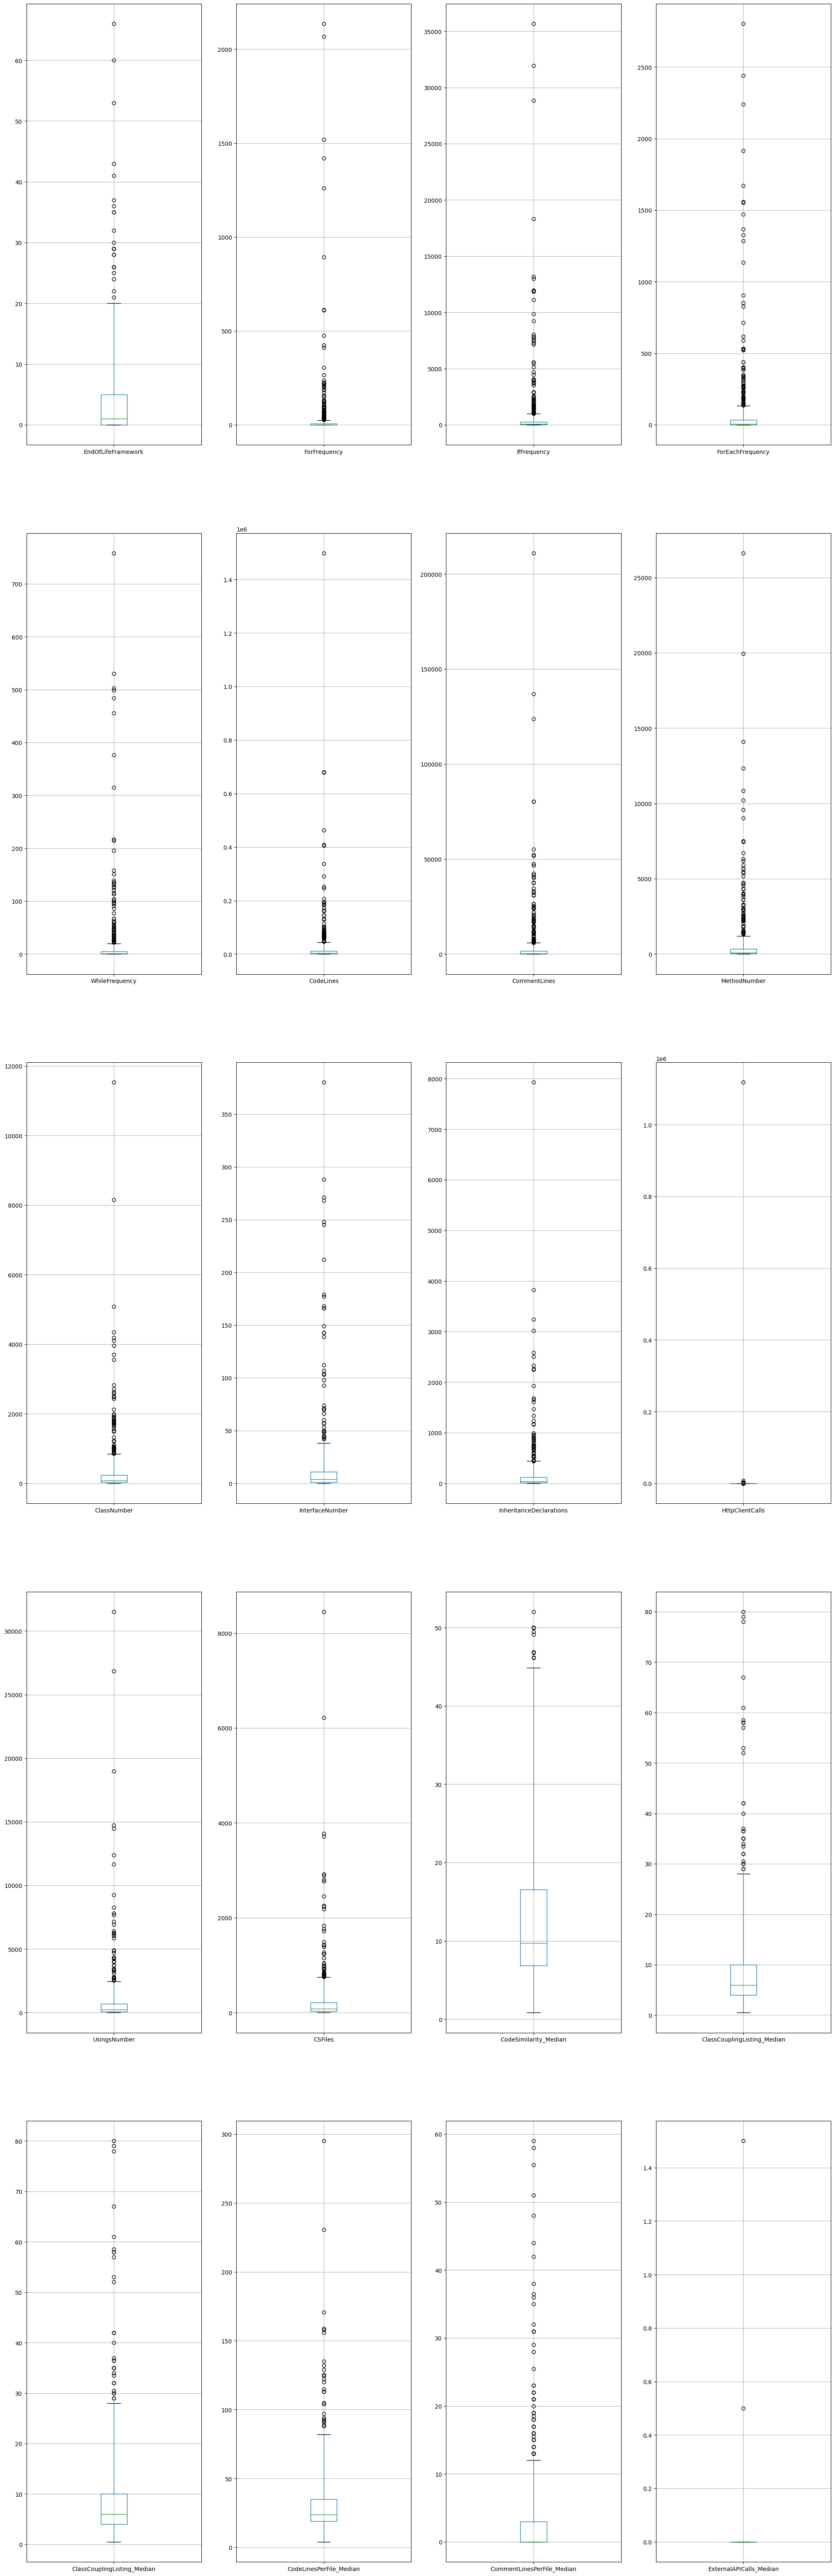

In [119]:
columns = dfcopy.select_dtypes(include=np.number).columns
col_nr = round(len(columns)/5)
fig, axes = plt.subplots(5, col_nr,  figsize=(25,80))
for i in range(col_nr):
    dfcopy.boxplot(column=columns[i], ax=axes[0][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+4], ax=axes[1][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+8], ax=axes[2][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+12], ax=axes[3][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+15], ax=axes[4][i], showfliers=True, whis=3)

Removing outliers based on percentiles

In [120]:
columns = dfcopy.select_dtypes(include=np.number).columns
dfcopy = remove_outliers(columns, dfcopy)


In [121]:
dfcopy.drop(columns=['Project_Name','Project_ID','ClassCouplingListing', 'CodeSimilarity', 'ExternalAPICalls', 'ExternalAPIExtracted','CodeLinesPerFile','CommentLinesPerFile'], axis=1,inplace=True)

Multiple imputation with knn imputation to remove 0s

Imputing twice to account for nan's and 0's

In [122]:
dfcopy

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,ExternalAPICalls_Median
0,0,18,1041,82,11,17643,2632,473,168,0,24,22,326,103,11,8,NaN,1,NaN
1,0,0,24,2,1,1713,36,48,56,3,29,0,247,64,6,6,22,0,0
2,0,0,7,1,0,1497,100,32,58,1,40,0,241,46,5,8,28,0,0
3,0,0,82,17,0,6313,361,109,144,10,72,2,552,154,15,6,21,0,0
4,0,1,15,3,0,1010,2,17,33,4,20,0,111,53,7,6,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,4,431,33,7,11249,404,518,214,12,127,4,357,235,12,6,27,0,0
596,2,0,6,2,0,442,42,20,7,0,0,0,13,9,6,7,18,1,0
597,7,0,3,0,0,460,16,17,17,2,7,0,84,19,9,3,20,0,0
598,3,0,2,2,3,156,37,8,5,0,1,0,11,3,NaN,8,45,2,0


In [123]:
imputed_nans = impute_nans(dfcopy)
imputed_nans.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,ExternalAPICalls_Median
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,2,12,311,34,6,12381,1516,296,194,8,95,36,476,165,11,7,26,1,0
std,2,27,563,60,13,20019,2723,413,247,9,123,355,556,187,5,3,9,2,0
min,0,0,0,0,0,11,0,0,1,0,0,-1,0,1,1,0,4,0,0
25%,0,0,16,1,0,1237,43,34,31,1,12,0,90,34,7,4,19,0,0
50%,1,0,67,7,1,3826,251,104,86,4,40,0,250,84,10,6,24,0,0
75%,3,6,248,32,5,12012,1506,351,232,11,119,2,666,214,15,8,32,3,0
max,8,156,2932,275,62,88267,14455,2055,914,38,539,7659,2600,687,20,16,50,8,0


In [124]:
imputed_nans.drop('ExternalAPICalls_Median', inplace=True, axis=1)
dfcopy = impute_zero_values(imputed_nans)

In [125]:
dfcopy.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,3,15,311,35,7,12381,1516,296,194,9,95,61,479,165,11,7,26,3
std,2,27,563,60,12,20019,2723,413,247,9,123,362,556,187,5,3,9,2
min,0,1,1,1,1,11,1,1,1,1,1,-1,1,1,1,0,4,0
25%,1,2,16,2,2,1237,44,34,31,2,12,4,91,34,7,4,19,2
50%,3,2,67,8,2,3826,251,104,86,5,40,13,254,84,10,6,24,3
75%,4,12,248,33,6,12012,1506,351,232,12,119,27,669,214,15,8,32,4
max,8,156,2932,275,62,88267,14455,2055,914,38,539,7659,2600,687,20,16,50,8


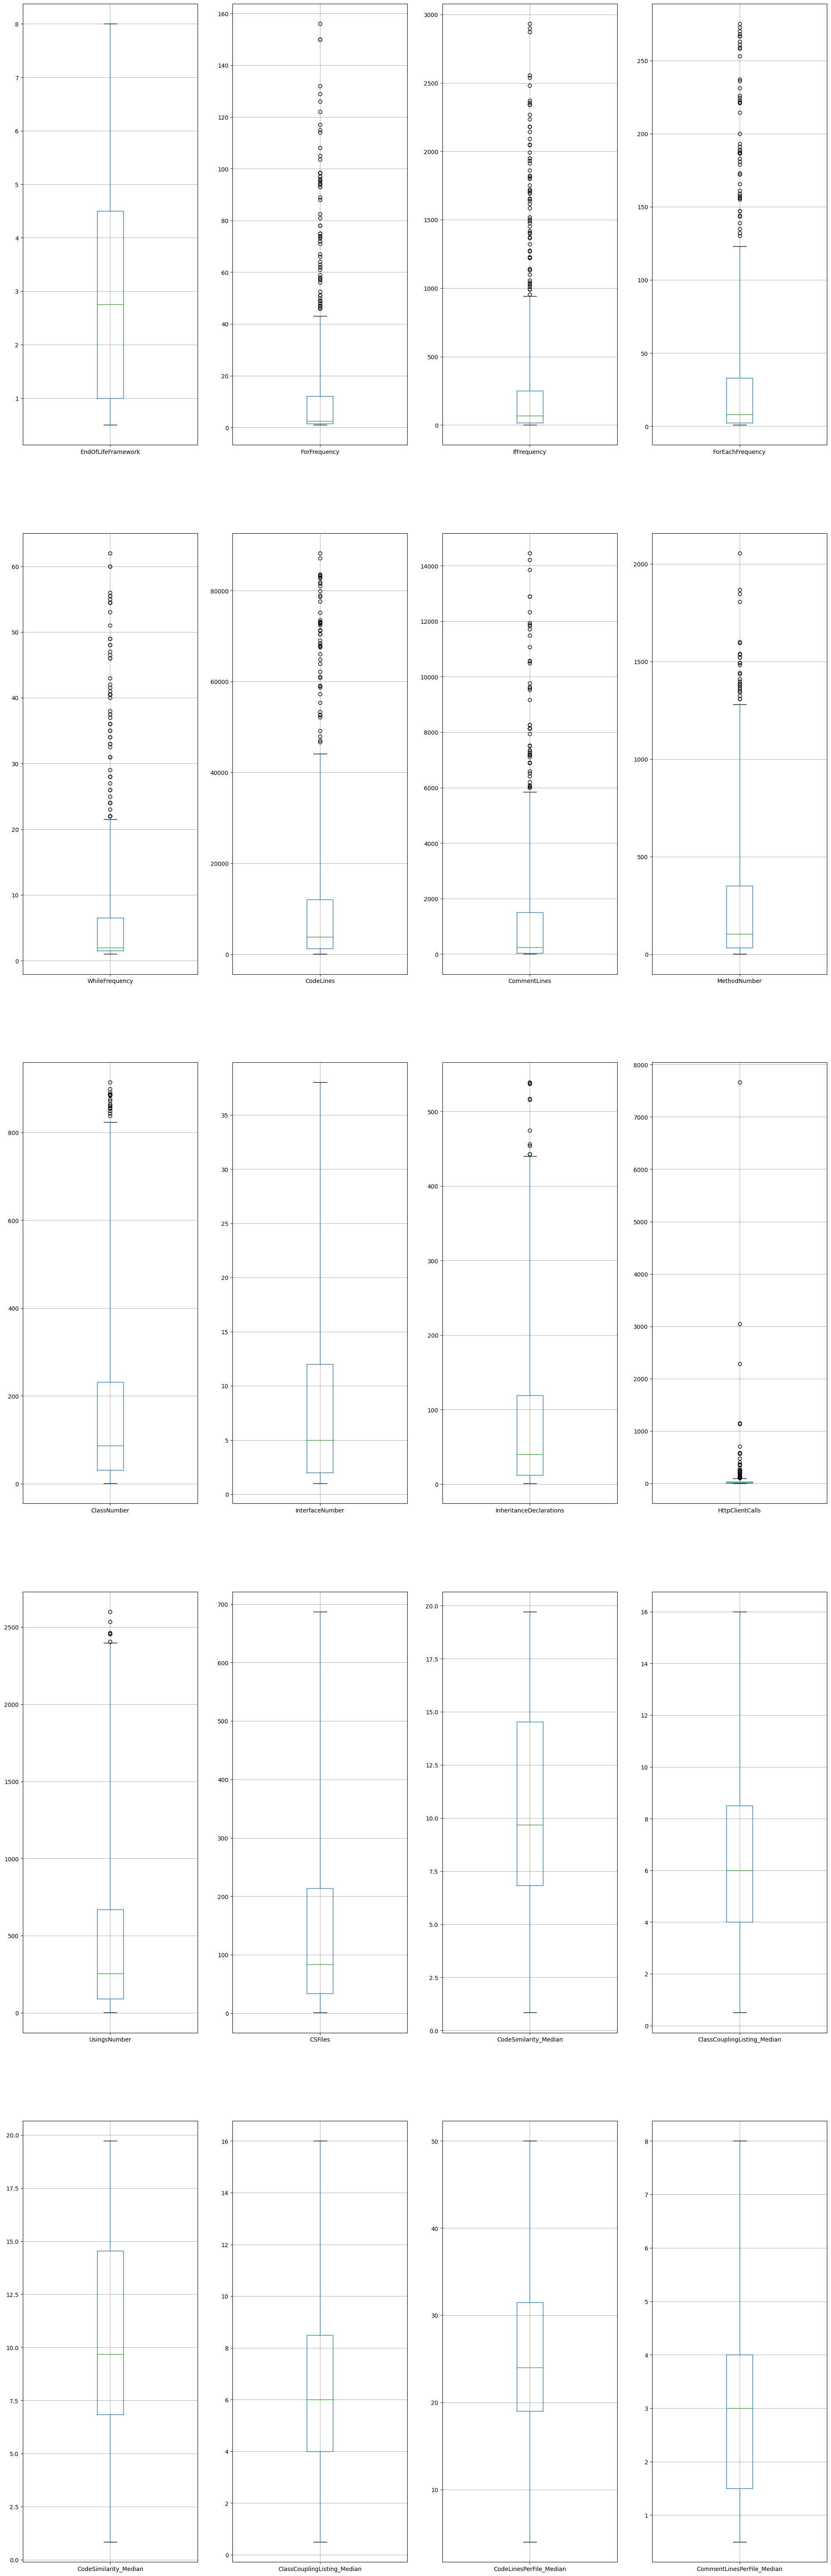

In [126]:
columns = dfcopy.select_dtypes(include=np.number).columns
col_nr = round(len(columns)/5)
fig, axes = plt.subplots(5, col_nr,  figsize=(25,80))
for i in range(col_nr):
    dfcopy.boxplot(column=columns[i], ax=axes[0][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+4], ax=axes[1][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+8], ax=axes[2][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+12], ax=axes[3][i], showfliers=True, whis=3)
    dfcopy.boxplot(column=columns[i+14], ax=axes[4][i], showfliers=True, whis=3)

In [127]:
dfcopy.describe()

,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,3,15,311,35,7,12381,1516,296,194,9,95,61,479,165,11,7,26,3
std,2,27,563,60,12,20019,2723,413,247,9,123,362,556,187,5,3,9,2
min,0,1,1,1,1,11,1,1,1,1,1,-1,1,1,1,0,4,0
25%,1,2,16,2,2,1237,44,34,31,2,12,4,91,34,7,4,19,2
50%,3,2,67,8,2,3826,251,104,86,5,40,13,254,84,10,6,24,3
75%,4,12,248,33,6,12012,1506,351,232,12,119,27,669,214,15,8,32,4
max,8,156,2932,275,62,88267,14455,2055,914,38,539,7659,2600,687,20,16,50,8


In [128]:
def histograms(dfcopy):
    columns = dfcopy.select_dtypes(include=np.number).columns
    num_columns = len(columns)
    num_rows = int(np.ceil(num_columns / 4))

    fig, axes = plt.subplots(num_rows, 4, figsize=(12, num_rows * 3))

    for i, column in enumerate(columns):
        row_index = i // 4
        col_index = i % 4
        axes[row_index, col_index].hist(dfcopy[column])
        axes[row_index, col_index].set_title(column)

    for i in range(num_columns, num_rows * 4):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

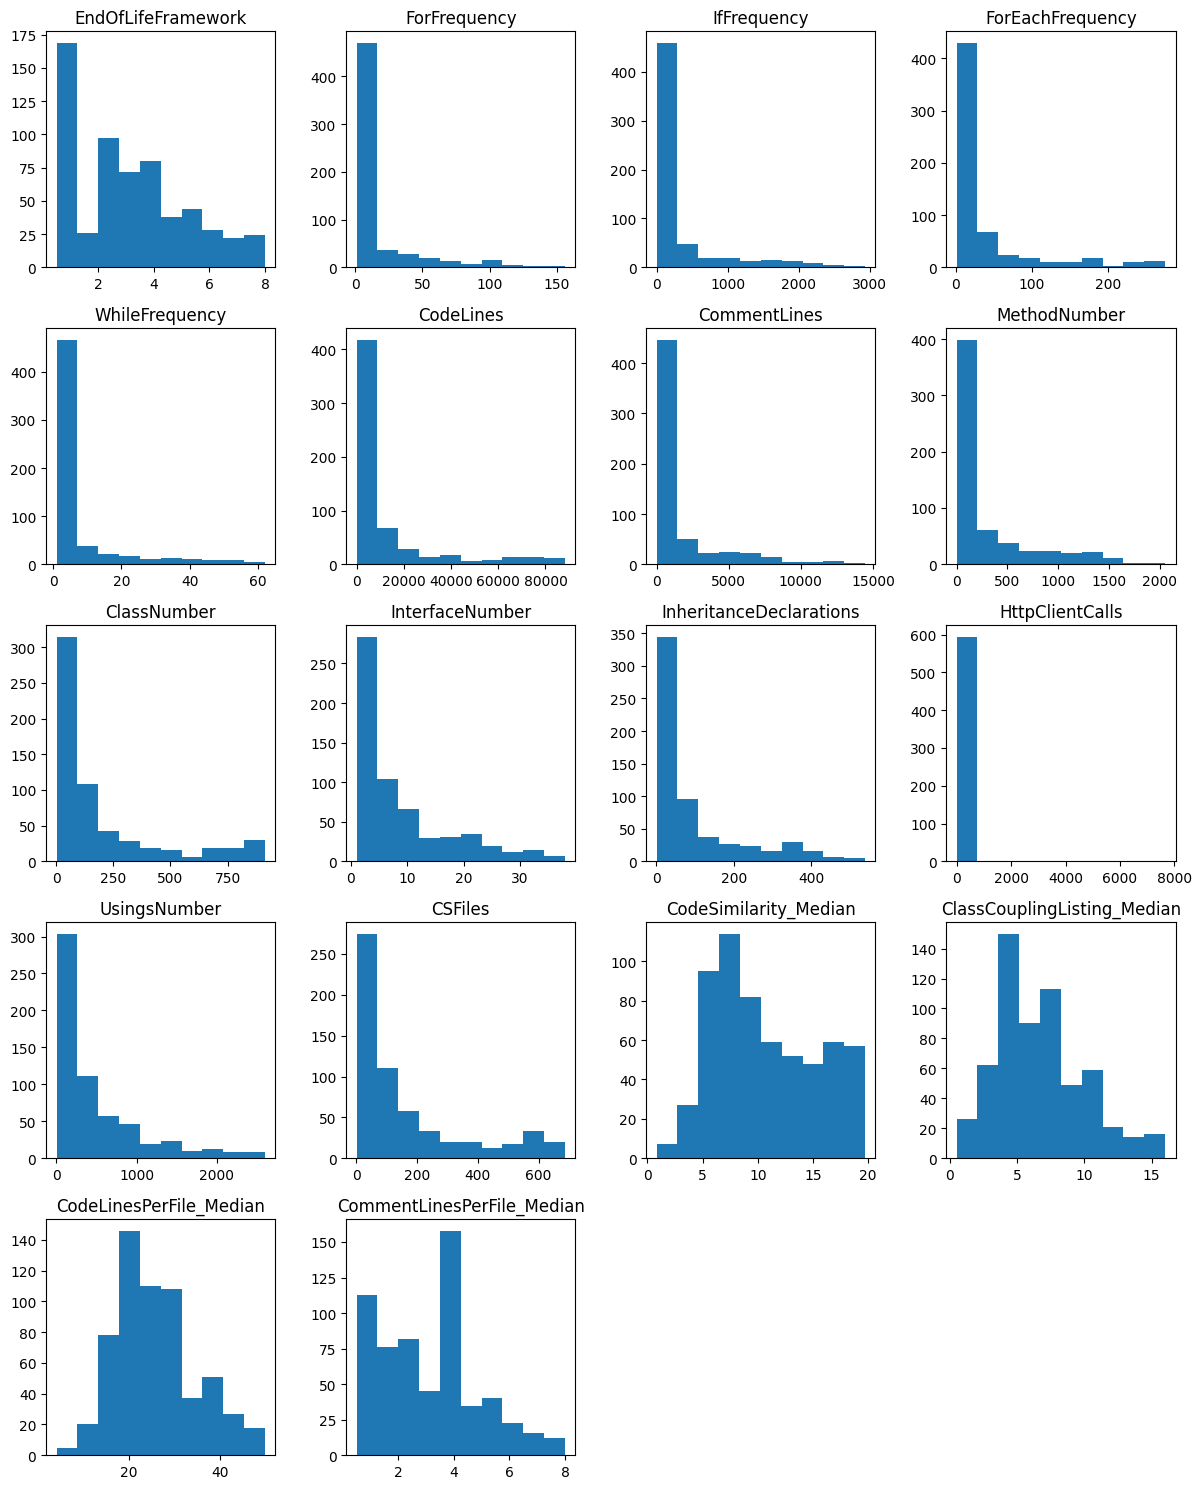

In [129]:
histograms(dfcopy)

In [130]:
dfcopy = combine_term_frequency(dfcopy)

In [131]:
dfcopy.describe()

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency
count,600,600,600,600,600,600,600,600,600,600,600,600,600,600,600
mean,3,12381,1516,296,194,9,95,61,479,165,11,7,26,3,367
std,2,20019,2723,413,247,9,123,362,556,187,5,3,9,2,645
min,0,11,1,1,1,1,1,-1,1,1,1,0,4,0,5
25%,1,1237,44,34,31,2,12,4,91,34,7,4,19,2,23
50%,3,3826,251,104,86,5,40,13,254,84,10,6,24,3,88
75%,4,12012,1506,351,232,12,119,27,669,214,15,8,32,4,297
max,8,88267,14455,2055,914,38,539,7659,2600,687,20,16,50,8,3354


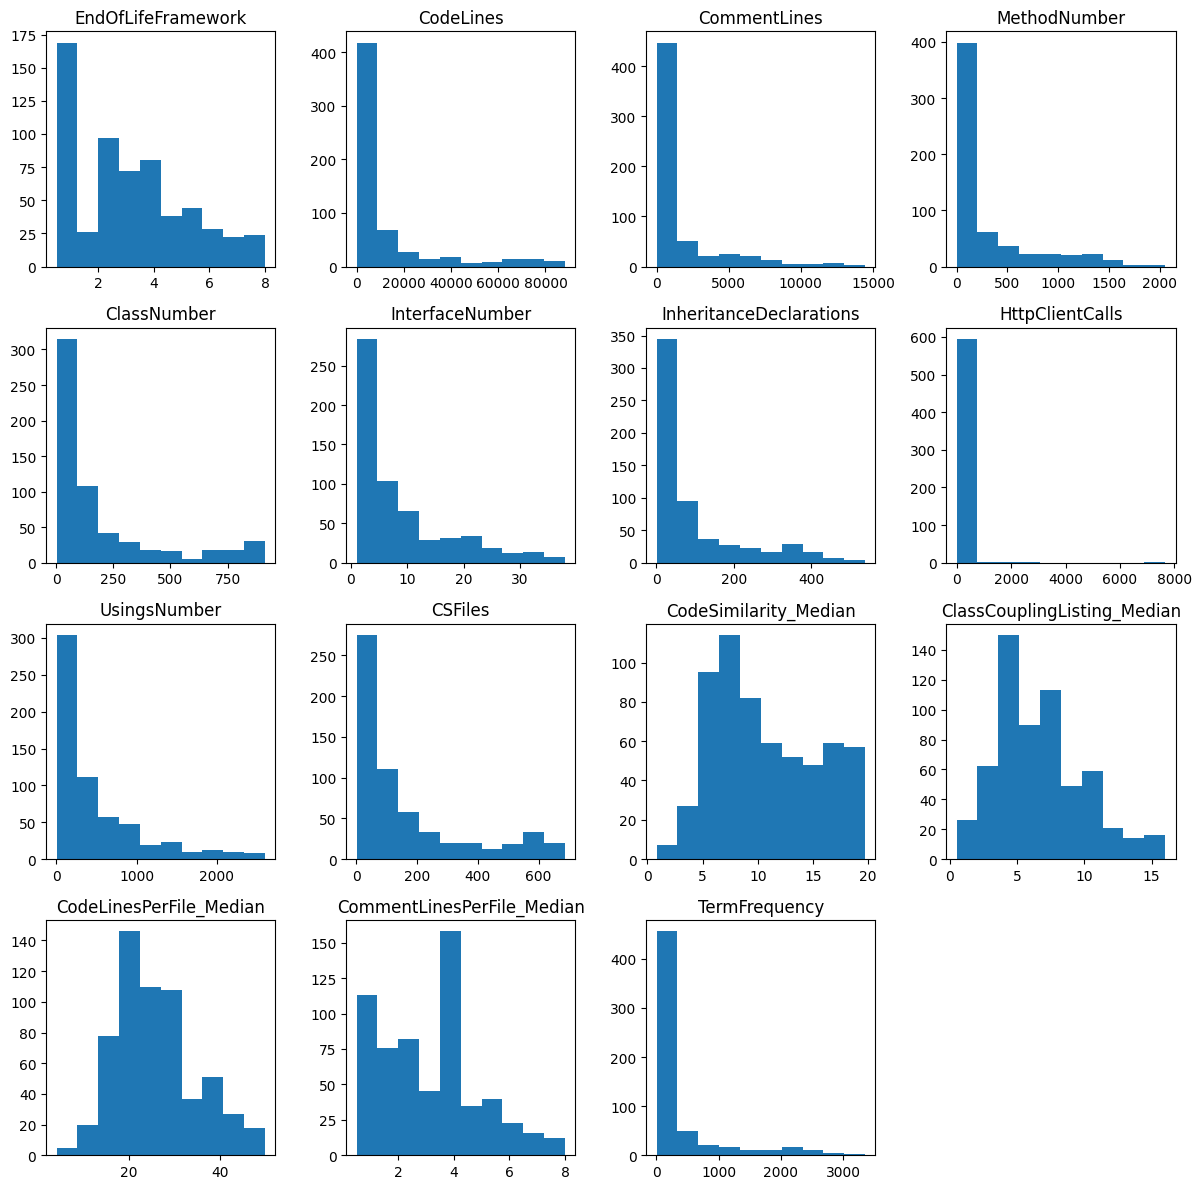

In [132]:
histograms(dfcopy)

In [133]:
columns = ['CodeLines', 'CommentLines', 'MethodNumber',
       'ClassNumber', 'InterfaceNumber','InheritanceDeclarations', 
       'UsingsNumber','HttpClientCalls', 'CSFiles','TermFrequency','CodeSimilarity_Median',
       'ClassCouplingListing_Median', 'CodeLinesPerFile_Median','CommentLinesPerFile_Median', 'TermFrequency','EndOfLifeFramework']
yeojohnson(columns, dfcopy)

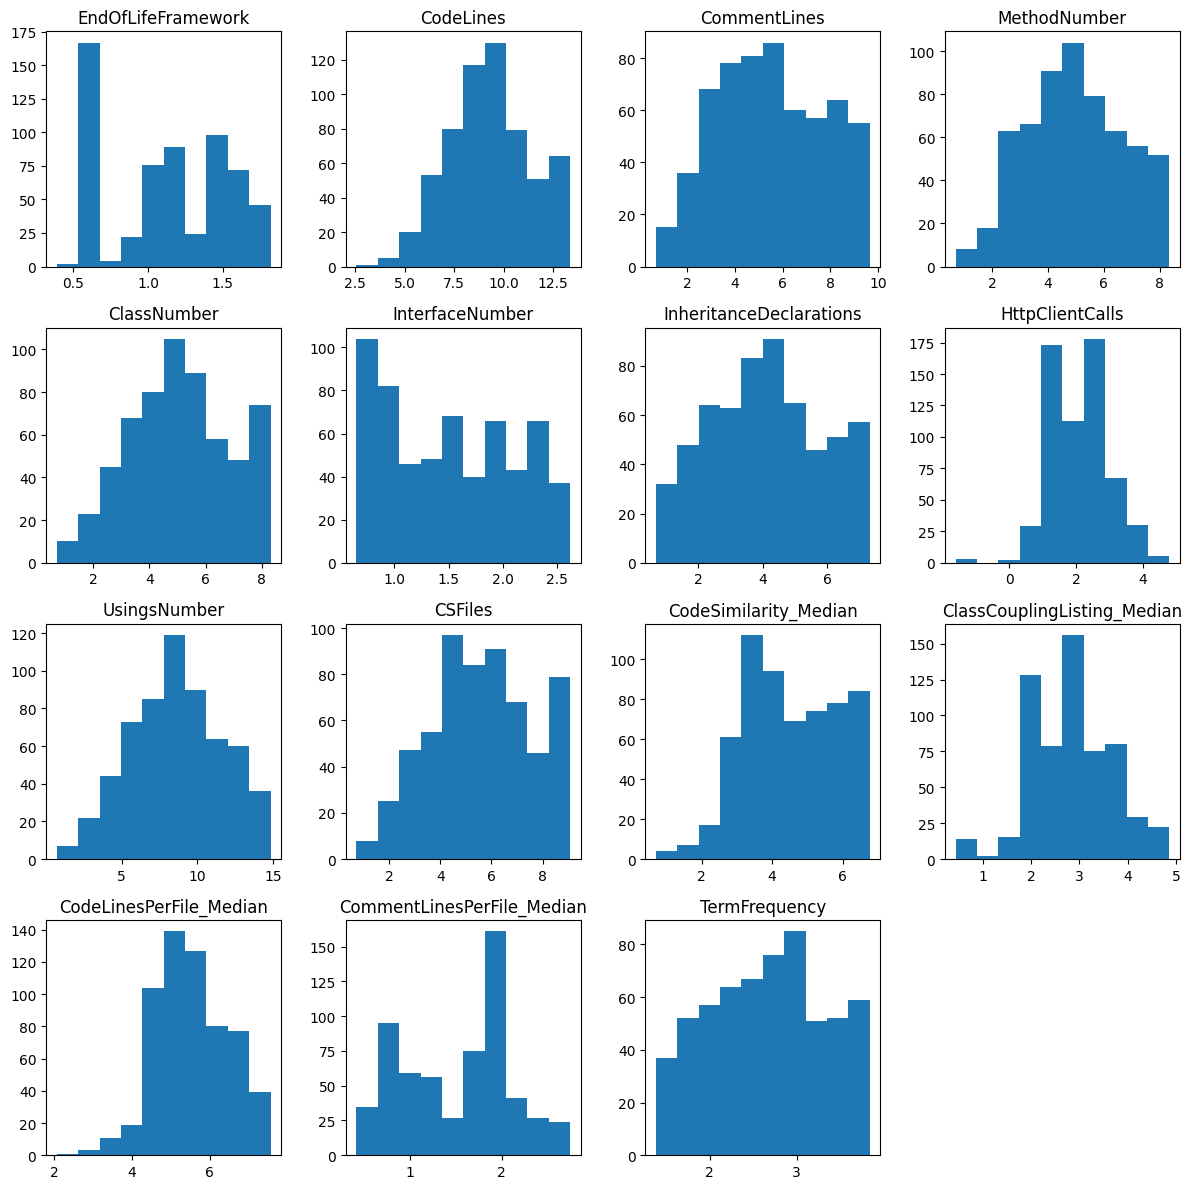

In [134]:
histograms(dfcopy)

In [135]:
column_std = dfcopy.std()

sorted_columns = column_std.sort_values(ascending=False)

print(sorted_columns)

UsingsNumber                  3
CommentLines                  2
CodeLines                     2
CSFiles                       2
ClassNumber                   2
MethodNumber                  2
InheritanceDeclarations       2
CodeSimilarity_Median         1
CodeLinesPerFile_Median       1
HttpClientCalls               1
ClassCouplingListing_Median   1
TermFrequency                 1
InterfaceNumber               1
CommentLinesPerFile_Median    1
EndOfLifeFramework            0
dtype: float64


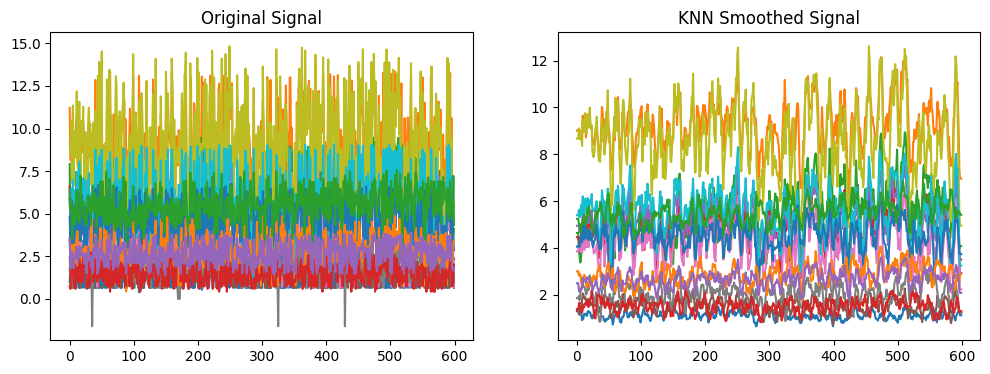

In [136]:
window_size_knn = 5

smoothed_signal_knn = knn_smoothing(dfcopy, window_size_knn)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(dfcopy)
plt.title('Original Signal')

plt.subplot(1, 2, 2)
plt.plot(smoothed_signal_knn)
plt.title('KNN Smoothed Signal')

plt.show()

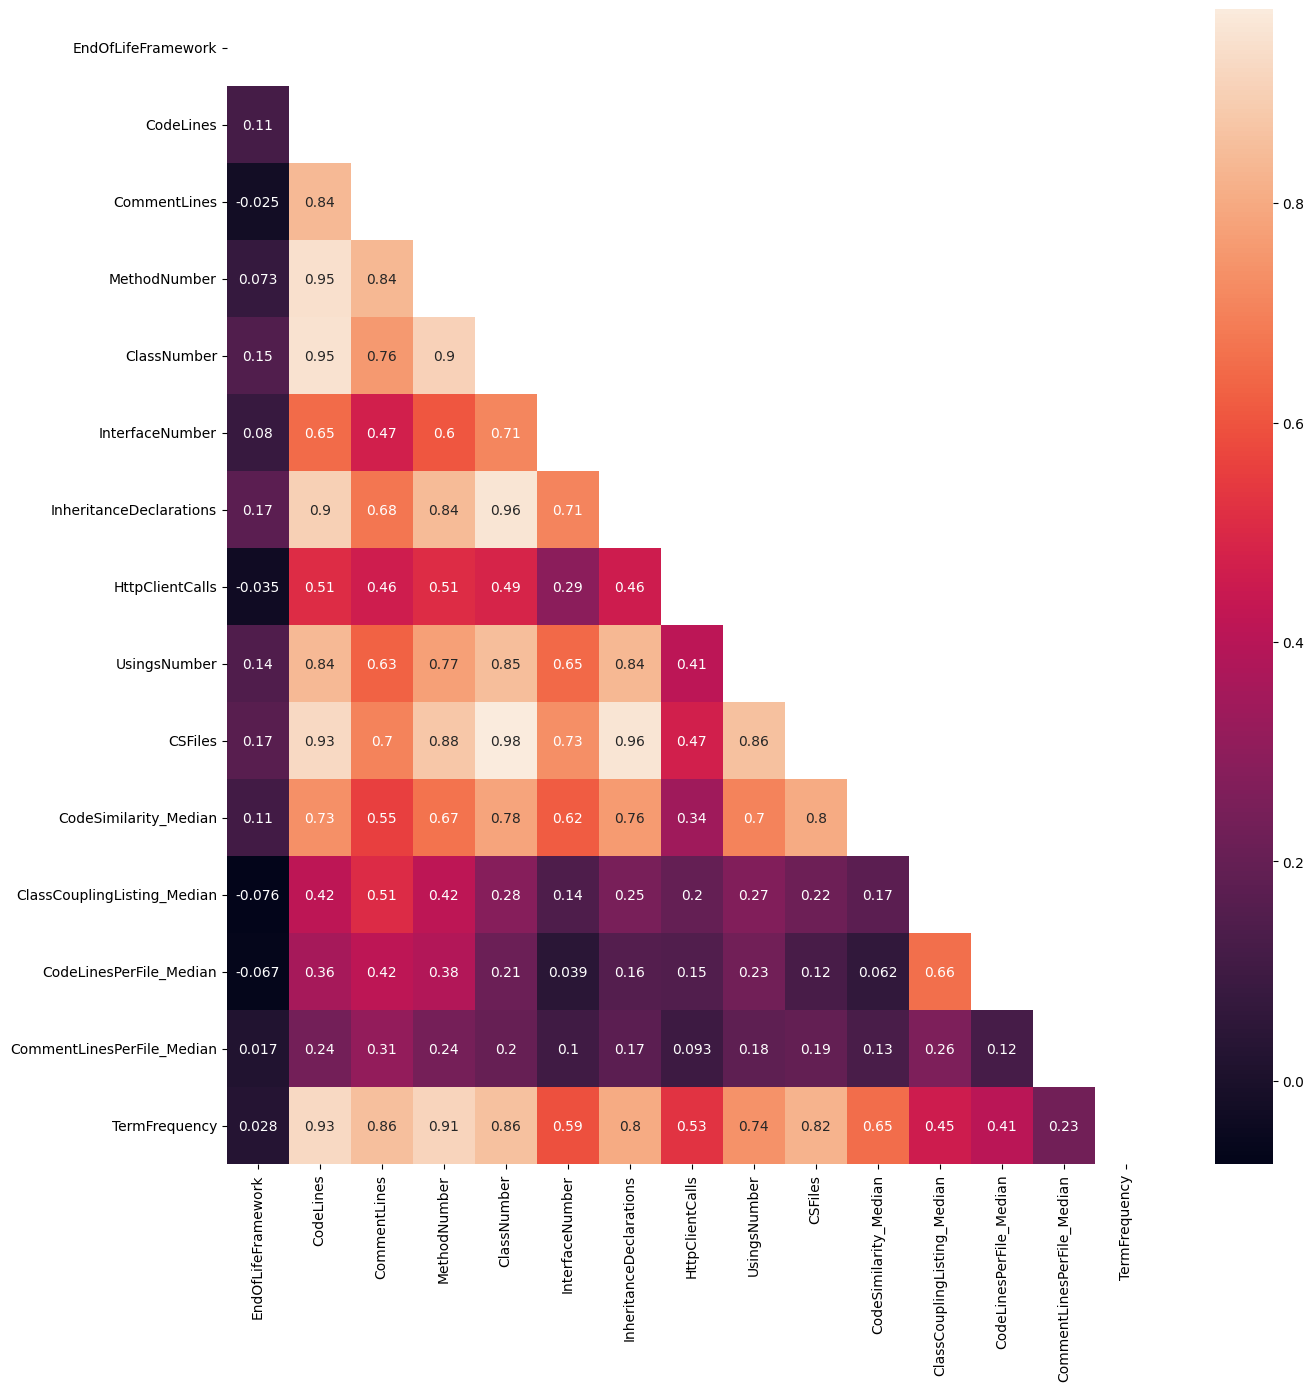

In [137]:
corr_m = dfcopy.corr()

mask = np.triu(corr_m)

plt.figure(figsize=(15,15))

sns.heatmap(corr_m, annot=True, mask=mask)
plt.show()

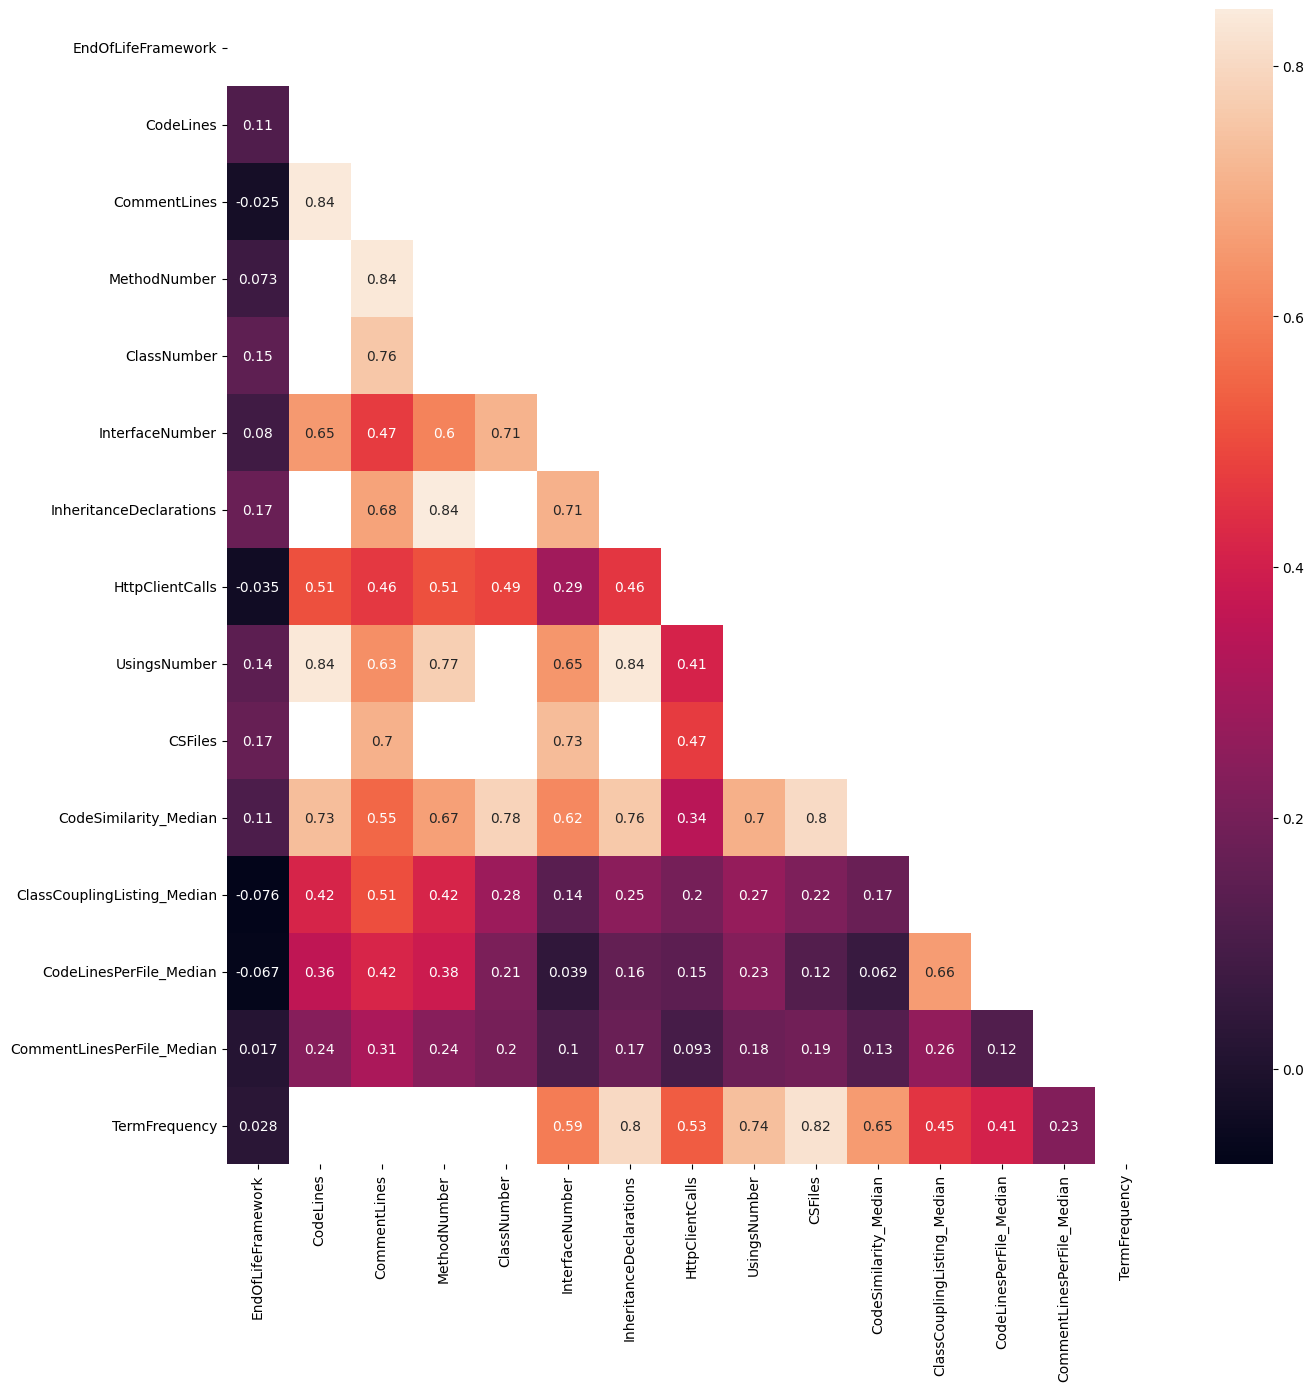

In [138]:
# Remove high correlation from sns
corr = (corr_m[(corr_m < 0.85)].dropna(thresh=2).dropna(thresh=2, axis=1))
mask = np.triu(corr)

plt.figure(figsize=(15,15))

sns.heatmap(corr, annot=True, mask=mask)
plt.show()

# PCA


In [139]:
knn_df = smoothed_signal_knn

In [140]:
X_s = preprocessing.StandardScaler().fit_transform(knn_df)
pcas = decomposition.PCA(n_components=2)
ress = pcas.fit_transform(X_s)
print(pcas.explained_variance_ratio_)
print('Explained variance: ', np.sum(pcas.explained_variance_ratio_))

[0.57159018 0.14395762]
Explained variance:  0.7155478048462006


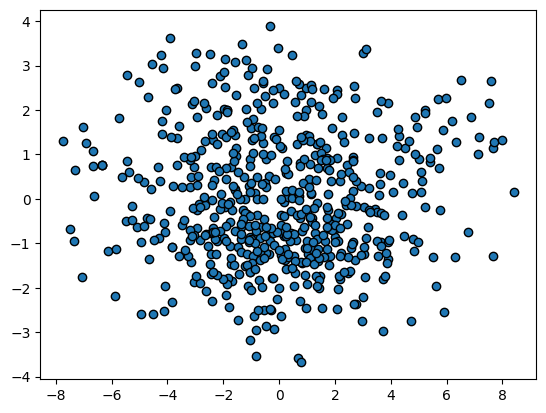

In [141]:
scatter = plt.scatter(ress[:, 0], ress[:, 1],edgecolors='black')
plt.show()

K Means

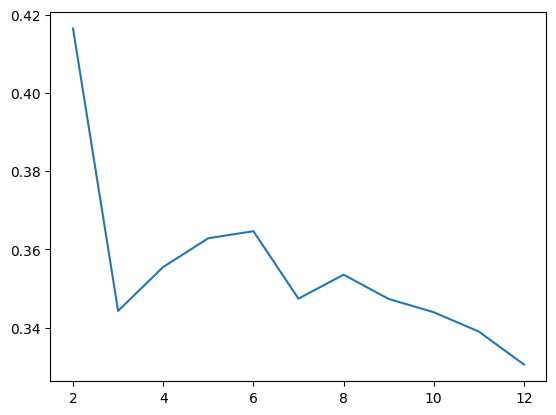

In [142]:
from sklearn.metrics import silhouette_score
silhouette = []
n_clusters = range(2,13)
for n in n_clusters:
    k_mean = cluster.KMeans(n_clusters=n, random_state=88, n_init=10)
    k_mean_clus = k_mean.fit_predict(ress)
    silhouette.append(silhouette_score(ress, k_mean.labels_))

plt.plot(n_clusters, silhouette)
plt.show()

## It can be seen that the elbow lies at 7

In [143]:
#Initialize the class object
kmeans = KMeans(n_clusters=7, n_init=seed, tol=1e-9, max_iter=1000)
newpca = pcas.fit_transform(X_s)
means = kmeans.fit_predict(newpca)

centroids = kmeans.cluster_centers_

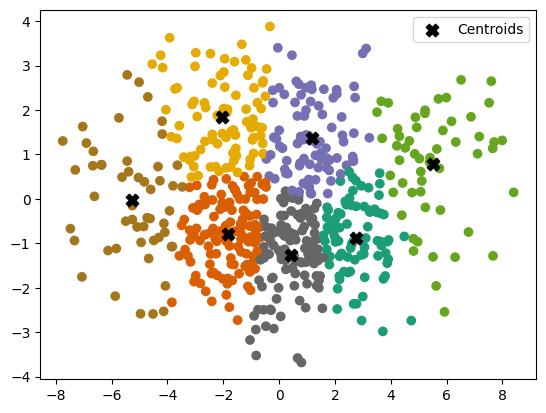

In [144]:
plt.scatter(newpca[:,0],newpca[:,1], c=means, cmap='Dark2')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 80, color='k', marker='X', label='Centroids')
plt.legend()
plt.show()

# DBSCAN

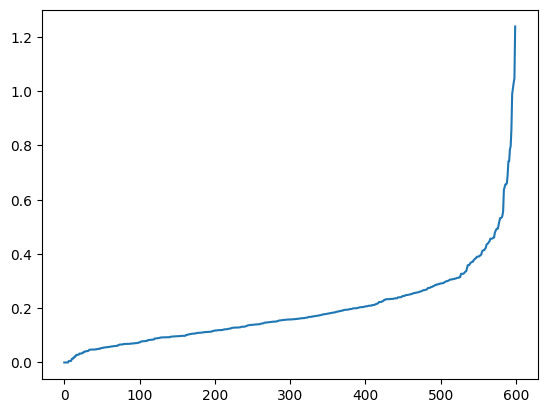

In [145]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=14)
neighbors_fit = neighbors.fit(ress)
distances, indices = neighbors_fit.kneighbors(ress)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [146]:
dbscan=DBSCAN(eps = 0.59, min_samples = 17)
yhat = dbscan.fit_predict(ress)
clusters = np.unique(yhat)
len(clusters)

2

## With noise

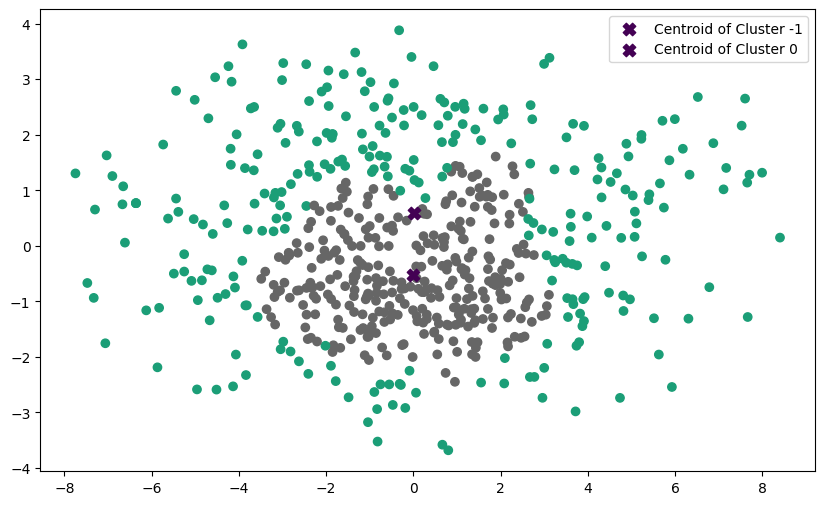

In [147]:
plt.figure(figsize=(10, 6))

scatter = plt.scatter(ress[:,0], ress[:,1] , c=yhat, cmap='Dark2')
plt.legend(handles=scatter.legend_elements(prop='colors' , num=len(clusters))[0], labels=list(unique(yhat)))

for cluster in clusters:
    cluster_points = ress[yhat == cluster]
    centroid = np.mean(cluster_points, axis=0)
    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color,
                label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

## After filtering out the noise

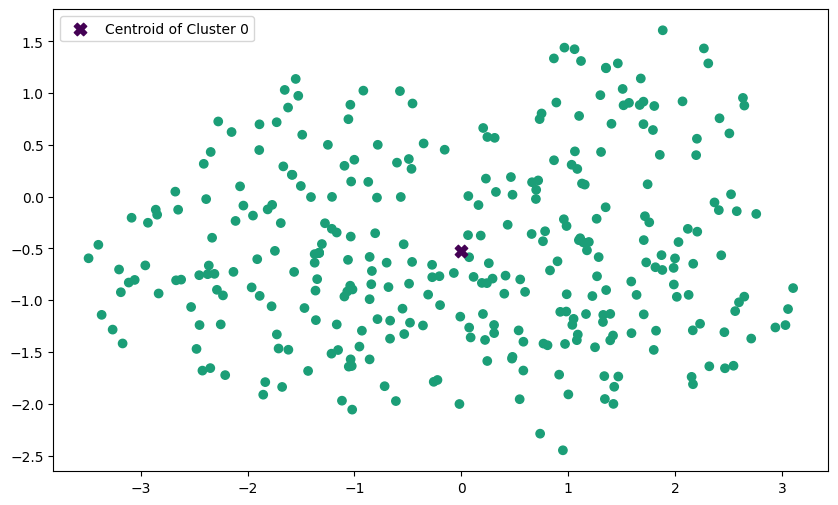

In [148]:
plt.figure(figsize=(10, 6))

filtered_points = ress[yhat != -1]
filtered_labels = yhat[yhat != -1]

scatter = plt.scatter(filtered_points[:, 0], filtered_points[:, 1], c=filtered_labels, cmap='Dark2')

plt.legend(handles=scatter.legend_elements(prop='colors' , num=len(clusters))[0], labels=list(unique(yhat)))

for cluster in clusters:
    if cluster != -1:
        cluster_points = ress[yhat == cluster]
        centroid = np.mean(cluster_points, axis=0)
        centroid_color = plt.cm.viridis(cluster / len(clusters))

        plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color,
                    label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

# Gausian Mixture Clustering

[0 1 2]


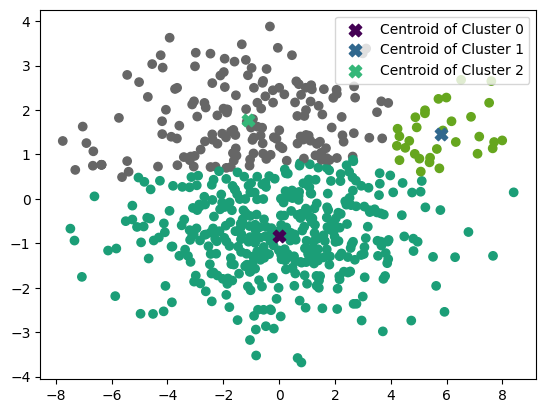

In [149]:
gaussian_mdl = GaussianMixture(n_components=3, random_state=42, tol=1e-9, max_iter=1000, means_init=np.array([ress[seed], ress[2 * seed], ress[3 * seed]]))
gaussian_mdl.fit(ress)
gaussian_res = gaussian_mdl.fit_predict(ress)

clusters = np.unique(gaussian_res) # get the unique clusters

scatter = plt.scatter(ress[:,0], ress[:,1] , c=gaussian_res, cmap='Dark2')
print(clusters)

for cluster in clusters:
    cluster_points = ress[gaussian_res == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

In [150]:
gaussian_res

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Birch Clustering

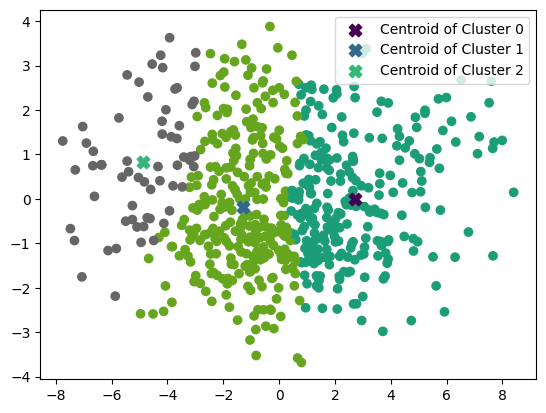

In [151]:
birch_model = Birch(branching_factor=50, n_clusters=3, threshold=1.75)
birch_model.fit(ress)
birch_res = birch_model.fit_predict(ress)

clusters = np.unique(birch_res) # get the clusters
scatter = plt.scatter(ress[:,0], ress[:,1] , c=birch_res, cmap='Dark2')


for cluster in clusters:
    cluster_points = ress[birch_res == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

# Meanshift clustering

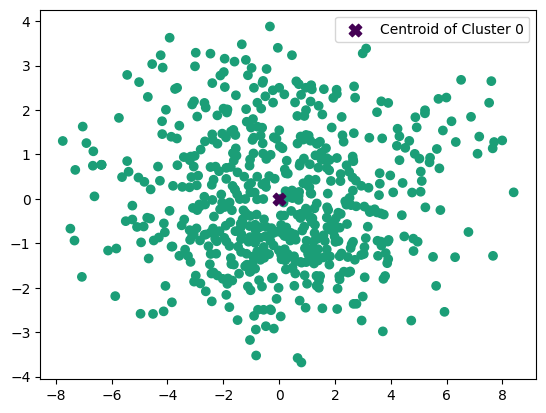

In [152]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=2)
meanshit_ress = ms.fit_predict(ress)
labels = ms.labels_
clusters = np.unique(meanshit_ress)
centers = ms.cluster_centers_
scatter = plt.scatter(ress[:,0], ress[:,1] , c=labels, cmap='Dark2')

for cluster in clusters:
    cluster_points = ress[meanshit_ress == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

# Bayesian Gaussian Mixture

C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\sgt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Loca

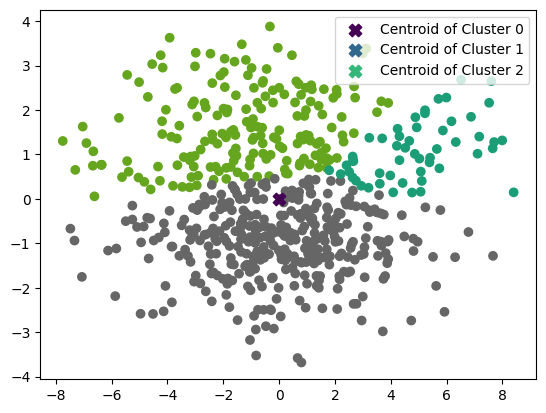

In [153]:
bgm = BayesianGaussianMixture(n_components=3, random_state=54)
bgm.fit(ress)
bgm_res = bgm.fit_predict(ress)
clusters = np.unique(bgm_res)

scatter = plt.scatter(ress[:,0], ress[:,1] , c=bgm_res, cmap='Dark2')

for cluster in clusters:
    cluster_points = ress[meanshit_ress == cluster]
    centroid = np.mean(cluster_points, axis=0)

    centroid_color = plt.cm.viridis(cluster / len(clusters))

    plt.scatter(centroid[0], centroid[1], marker='X', s=80, color=centroid_color, label=f'Centroid of Cluster {cluster}')

plt.legend()
plt.show()

# GM

## Extract points closest to centroids

In [154]:
gaussian_res

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [155]:
clusters = np.unique(gaussian_res)

selected_points_in_clusters = {}

for cluster in clusters:
    cluster_indices = np.where(gaussian_res == cluster)[0]
    sorted_indices = np.argsort(cluster_indices)

    cluster_points = ress[cluster_indices[sorted_indices]]
    centroid = np.mean(cluster_points, axis=0)

    distances = np.linalg.norm(cluster_points - centroid, axis=1)

    # Top closest points to the centroids
    k = 5
    closest_indices = np.argsort(distances)[:k]
    closest_points = cluster_points[closest_indices]

    selected_points_in_clusters[cluster] = closest_points

for cluster, points in selected_points_in_clusters.items():
    print(f'{cluster} {points}')

0 [[ 0.11476737 -0.77438204]
 [-0.06988565 -0.73656709]
 [ 0.1923612  -0.83250911]
 [ 0.23959281 -0.83448596]
 [-0.20475255 -0.76754467]]
1 [[5.86647328 1.54051755]
 [5.64943203 1.12413713]
 [6.17482168 1.74771269]
 [6.32816503 1.28104829]
 [5.40708506 0.92765447]]
2 [[-1.15881674  1.73722191]
 [-0.93471601  1.79722077]
 [-1.00757343  1.60679711]
 [-1.18076902  2.0205682 ]
 [-0.76939378  1.6248277 ]]


## Map points to rows and load them in a dataframe

In [156]:
original_rows = {}

for cluster, points in selected_points_in_clusters.items():
    print(points)
    original_indices = np.where(np.isin(ress, points).all(axis=1))[0]
    original_rows[cluster] = dataframe.iloc[original_indices]
    
for cluster, row in original_rows.items():
    print(f'{cluster} {row}')

[[ 0.11476737 -0.77438204]
 [-0.06988565 -0.73656709]
 [ 0.1923612  -0.83250911]
 [ 0.23959281 -0.83448596]
 [-0.20475255 -0.76754467]]
[[5.86647328 1.54051755]
 [5.64943203 1.12413713]
 [6.17482168 1.74771269]
 [6.32816503 1.28104829]
 [5.40708506 0.92765447]]
[[-1.15881674  1.73722191]
 [-0.93471601  1.79722077]
 [-1.00757343  1.60679711]
 [-1.18076902  2.0205682 ]
 [-0.76939378  1.6248277 ]]
0                                Project_ID  \
12   0ae6c095-628b-4223-bbbb-503dfb9edbf6   
78   5aa4869d-2f23-4b60-be46-6eb5b2907180   
231  bd58e733-4227-416c-895e-5bb02fd75f2b   
266  a9c7f80e-241e-4366-9b7b-84c9da606842   
299  6f943060-6633-4ce0-b8cb-6f841d23a517   

                                   Project_Name  EndOfLifeFramework  \
12        alulema_DDD-CleanArchitectureTemplate                   0   
78         dotnet-architecture_eShopModernizing                   3   
231  referbruv_ContainerNinja.CleanArchitecture                   0   
266                           taxjar_taxjar.n

In [157]:
gsm_clustered_df = pd.concat([df.assign(Cluster=cluster) for cluster, df in original_rows.items()])
gsm_clustered_df

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,Cluster
12,0ae6c095-628b-4223-bbbb-503dfb9edbf6,alulema_DDD-CleanArchitectureTemplate,0,2,23,11,2,1457,91,44,...,25,"[0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,202,"[5, 2, 0, 16, 1, 15, 0, 16, 1, 15, 3, 16, 2, 1...","[21, 11, 7, 11, 5, 33, 7, 34, 5, 34, 7, 35, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.85, 3.16, 0.64, 3.12, 3.18, 0.65, 3.1, 87.0...",42,0
78,5aa4869d-2f23-4b60-be46-6eb5b2907180,dotnet-architecture_eShopModernizing,3,3,276,44,0,12225,1572,425,...,112,"[0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,694,"[1, 3, 20, 21, 8, 3, 4, 53, 49, 49, 0, 6, 15, ...","[22, 15, 15, 55, 137, 75, 31, 36, 124, 296, 29...","[0, 17, 0, 4, 12, 2, 1, 0, 0, 1, 1, 0, 0, 7, 0...","[93.9, 91.47, 91.38, 91.73, 90.86, 88.78, 96.0...",214,0
231,bd58e733-4227-416c-895e-5bb02fd75f2b,referbruv_ContainerNinja.CleanArchitecture,0,0,40,5,0,1866,39,42,...,45,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,181,"[5, 14, 3, 10, 14, 5, 4, 3, 18, 0, 3, 1, 0, 1,...","[43, 58, 15, 75, 123, 31, 15, 25, 96, 10, 9, 1...","[0, 5, 0, 0, 0, 0, 2, 0, 14, 0, 0, 0, 0, 0, 0,...","[4.18, 3.78, 4.25, 6.41, 2.36, 0.68, 0.71, 4.9...",61,0
266,a9c7f80e-241e-4366-9b7b-84c9da606842,taxjar_taxjar.net,1,0,18,3,0,3271,38,102,...,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,81,"[60, 2, 2, 2, 3, 0, 0, 0, 2, 3, 7, 3, 3, 6, 3,...","[6, 423, 23, 47, 19, 46, 13, 23, 19, 21, 108, ...","[0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, ...","[1.3, 0.2, 1.84, 0.26, 0.12, 0.08, 0.19, 0.01,...",33,0
299,6f943060-6633-4ce0-b8cb-6f841d23a517,abbaye_WpfHexEditorControl,0,33,643,47,10,9830,3095,311,...,39,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,222,"[1, 10, 17, 5, 1, 2, 1, 21, 18, 48, 6, 36, 19,...","[7, 50, 18, 33, 13, 7, 5, 19, 7, 5, 39, 28, 19...","[3, 7, 29, 23, 9, 3, 6, 3, 3, 6, 7, 7, 34, 7, ...","[3.27, 1.85, 3.59, 4.88, 3.7, 66.38, 3.74, 2.4...",83,0
359,5e63f023-3f6f-4ea1-afdb-b7cf711cdd43,DapperLib_Dapper,0,43,746,70,49,19481,3841,747,...,174,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,450,"[12, 8, 10, 8, 8, 10, 24, 13, 13, 4, 11, 14, 8...","[41, 33, 58, 27, 35, 46, 82, 41, 42, 25, 45, 6...","[0, 0, 0, 4, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, ...","[29.76, 27.4, 3.93, 0.42, 1.27, 22.89, 0.66, 0...",152,1
360,1e7cce5a-e245-48be-b0c8-ea3bb13b3e6b,DaveSkender_Stock.Indicators,0,221,451,30,2,23120,2453,997,...,190,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,347,"[35, 22, 11, 23, 40, 34, 6, 2, 6, 6, 2, 8, 5, ...","[6, 85, 6, 60, 46, 46, 89, 85, 39, 10, 14, 46,...","[4, 16, 4, 9, 12, 9, 10, 15, 4, 4, 0, 7, 4, 0,...","[84.63, 75.6, 76.66, 25.76, 26.93, 10.02, 55.6...",460,1
373,c1daa636-e335-42b8-982d-24a90d9dca4e,dotnet_BenchmarkDotNet,3,129,2236,438,38,58738,5483,2273,...,730,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,4010,"[35, 28, 30, 4, 6, 4, 25, 4, 6, 4, 2, 2, 12, 5...","[156, 164, 274, 16, 29, 10, 5, 207, 31, 54, 26...","[4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[3.0, 2.58, 2.71, 1.39, 0.49, 1.43, 3.48, 3.36...",929,1
496,7ee6274f-4cff-4a94-ad4e-a3ee4d73c7bf,ONLYOFFICE_CommunityServer,19,610,35665,2240,530,680452,211030,19947,...,3828,"[0, 96, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,...",128,26849,"[23, 58, 35, 28, 22, 21, 103, 29, 29, 29, 25, ...","[52, 568, 242, 134, 15, 63, 32, 144, 109, 65, ...","[1, 3, 2, 1, 17, 1, 1, 165, 3, 1, 1, 1, 4, 13,...","[0.24, 4.69, 0.63, 0.67, 66.44, 2.0, 1.25, 5.6...",6217,1
499,fe00f4c6-9a09-4bfc-bbc9-fd0bbf41983d,openpetra_openpetra,1,425,11129,1472,315,172678,55092,4667,...,213,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,6204,"[39, 128, 48, 82, 37, 63, 21, 64, 139, 110, 49...","[71, 256, 112, 400, 43, 94, 90, 384, 1184, 469...","[25, 104, 47, 145, 33, 5

In [158]:
gsm_clustered_df = combine_term_frequency(gsm_clustered_df)

In [159]:
columns_to_plot = ['CodeLines','ClassNumber','ClassNumber','TermFrequency','CSFiles','Cluster']
gsm_clustered_df[columns_to_plot]

,CodeLines,ClassNumber,ClassNumber,TermFrequency,CSFiles,Cluster
12,1457,36,36,38,42,0
78,12225,231,231,323,214,0
231,1866,62,62,45,61,0
266,3271,59,59,21,33,0
299,9830,80,80,733,83,0
359,19481,414,414,908,152,1
360,23120,467,467,704,460,1
373,58738,1647,1647,2841,929,1
496,680452,8155,8155,39045,6217,1
499,172678,986,986,13341,517,1


# K Means

In [60]:
newpca = pcas.fit_transform(X_s)

initial_centroids = np.array([newpca[seed], newpca[2 * seed], newpca[3 * seed], newpca[4 * seed], newpca[5 * seed], newpca[6 * seed], newpca[7 * seed]])
kmeans = KMeans(n_clusters=7, init=initial_centroids, n_init=1, tol=1e-9, max_iter=1000)
means = kmeans.fit(newpca)

centroids = kmeans.cluster_centers_

0 {'Centroid': (2.7504850293400915, -0.8808810788774524), 'ClosestPoint': (2.6482219743628774, -0.9650077097953604)}
1 {'Centroid': (-1.8388699379860243, -0.7839020852373085), 'ClosestPoint': (-1.9622179145695047, -0.875711306496603)}
2 {'Centroid': (1.1895068085629865, 1.3676061967857145), 'ClosestPoint': (1.1201460162653651, 1.3106115909945462)}
3 {'Centroid': (5.523535912466407, 0.7809800946136829), 'ClosestPoint': (5.387612021745462, 0.8232478337611078)}
4 {'Centroid': (-2.0336965696919247, 1.851257270031246), 'ClosestPoint': (-2.210777926618053, 1.88025371119433)}
5 {'Centroid': (-5.255583423622806, -0.024349530952316883), 'ClosestPoint': (-5.254815102638217, -0.15083414302645232)}
6 {'Centroid': (0.44344770254439747, -1.2621244516714965), 'ClosestPoint': (0.5364799789060423, -1.2910752551366214)}


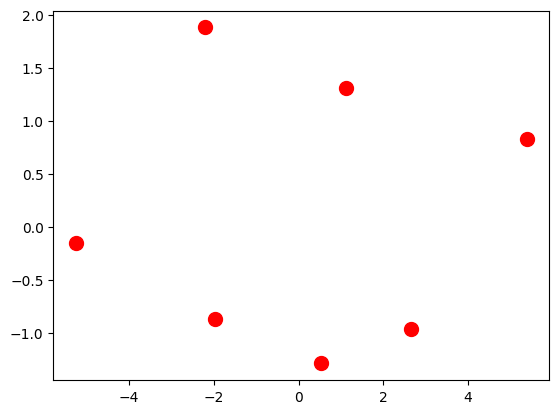

In [160]:
selected_points_in_clusters_km = {}

for i, centroid in enumerate(centroids):
    cluster_points = newpca[means == i]
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    closest_point_index = np.argmin(distances)
    closest_point = cluster_points[closest_point_index]

    centroid_tuple = tuple(centroid)
    closest_point_tuple = tuple(closest_point)

    selected_points_in_clusters_km[i] = {'Centroid': centroid_tuple, 'ClosestPoint': closest_point_tuple}
    plt.scatter(closest_point[0], closest_point[1], s=100, color='red', marker='o', label=f'Closest Point to Centroid {i}')


for cluster, points in selected_points_in_clusters_km.items():
    print(f'{cluster} {points}')

## Map points to rows

In [161]:
original_rows = {}

for cluster, points_info in selected_points_in_clusters_km.items():
    closest_point_tuple = points_info['ClosestPoint']
    distances = np.linalg.norm(ress - np.array(closest_point_tuple), axis=1)
    closest_index = np.argmin(distances)
    original_rows[cluster] = dataframe.iloc[closest_index]

for cluster, row in original_rows.items():
    print(f'{cluster} {row}')

0 Project_ID                              8e8db3e7-244b-444f-963c-ac695b5bd76b
Project_Name                         itsmiracler_Practical-CleanArchitecture
EndOfLifeFramework                                                         0
ForFrequency                                                              13
IfFrequency                                                             1490
ForEachFrequency                                                         123
WhileFrequency                                                            46
CodeLines                                                              62221
CommentLines                                                            1337
MethodNumber                                                            1805
ClassNumber                                                             1894
InterfaceNumber                                                           71
InheritanceDeclarations                                                  9

In [162]:
kmeans_clustered_df = pd.DataFrame(original_rows.values())
kmeans_clustered_df['Cluster'] = original_rows.keys()
kmeans_clustered_df

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,Cluster
130,8e8db3e7-244b-444f-963c-ac695b5bd76b,itsmiracler_Practical-CleanArchitecture,0,13,1490,123,46,62221,1337,1805,...,912,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",42,6056,"[13, 10, 8, 3, 10, 10, 10, 10, 3, 11, 11, 16, ...","[59, 31, 81, 17, 29, 29, 25, 6, 10, 29, 9, 26,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[96.65, 96.4, 96.67, 96.58, 96.95, 96.25, 93.7...",1761,0
171,d4b7f85f-b5d8-44f9-be03-57c6b3765590,matthewrenze_clean-architecture-core,0,4,21,3,0,3520,70,162,...,32,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,394,"[0, 3, 10, 0, 10, 3, 3, 10, 0, 5, 19, 0, 6, 8,...","[8, 26, 42, 8, 8, 42, 26, 8, 16, 10, 27, 42, 8...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 1.76, 5.05, 3.41, 1.75, 4.47, 0.1, 1.7, ...",95,1
469,6a54ad22-1408-4cc1-ae46-7da22cf7c855,microsoftgraph_aspnet-snippets-sample,1,0,90,6,0,3398,731,43,...,11,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,154,"[7, 38, 12, 13, 31, 72, 31, 83, 44, 9, 81, 74,...","[24, 138, 65, 38, 80, 359, 138, 513, 249, 33, ...","[2, 19, 10, 7, 21, 76, 16, 115, 43, 2, 116, 78...","[64.3, 10.15, 20.69, 16.87, 19.56, 22.18, 18.3...",33,2
358,a7f2270f-6944-4512-9757-5e29a82586da,damikun_trouble-training,0,3,306,34,2,18059,2207,357,...,255,"[0, 17, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0...",24,1704,"[39, 22, 15, 12, 2, 15, 11, 11, 11, 10, 11, 14...","[188, 204, 91, 117, 12, 78, 27, 46, 58, 62, 53...","[5, 26, 10, 10, 0, 11, 8, 12, 9, 7, 9, 7, 2, 4...","[68.2, 62.01, 66.69, 76.9, 76.63, 58.54, 54.55...",299,3
400,49ad0066-8f82-46d3-b299-21ab5e159153,gdsram_UnitOfWork,1,0,61,2,0,1527,288,54,...,15,"[0, 0, 0, 0, 0]",0,115,"[4, 1, 6, 1, 34, 4, 16, 16, 11, 65, 2, 47, 17,...","[23, 13, 23, 12, 90, 21, 34, 24, 23, 370, 25, ...","[2, 0, 3, 0, 9, 0, 26, 14, 5, 68, 0, 38, 18, 0...","[4.6, 5.93, 5.35, 12.9, 4.73, 6.53, 7.81, 3.14...",29,4
596,b0197398-d6ce-4d58-91cc-139e9e48d109,ZacMarcus_YahooFinance.NET,2,0,6,2,0,442,42,20,...,0,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,13,"[74, 8, 1, 1, 1, 7, 12]","[60, 200, 9, 14, 18, 15, 37, 74, 15]","[4, 2, 0, 0, 0, 18, 0, 1, 17]","[8.87, 9.72, 27.62, 8.5, 28.55, 9.3, 42.31, 4....",9,5
114,df11bcb9-287f-4ac8-b0e8-6d5582e25719,henriquelourente_Domain-Driven-Design-Sample,10,0,24,2,0,3308,133,134,...,60,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,379,"[3, 11, 2, 9, 11, 9, 4, 6, 6, 9, 6, 4, 7, 7, 7...","[24, 57, 11, 44, 61, 44, 22, 30, 30, 41, 23, 2...","[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[64.26, 60.27, 5.63, 1.32, 3.5, 1.71, 18.86, 3...",110,6


In [164]:
kmeans_clustered_df = combine_term_frequency(kmeans_clustered_df)

In [165]:
most_important_component_index = pcas.explained_variance_ratio_.argmax()
loadings = pcas.components_[most_important_component_index]
feature_names = dfcopy.columns
most_important_loadings = dict(zip(feature_names, loadings))
most_important_loadings_sorted = sorted(most_important_loadings.items(), key=lambda kv: kv[1], reverse=True)
for feature in most_important_loadings_sorted:
    print(f"{feature}")

('CodeLines', 0.33584452824024225)
('ClassNumber', 0.33130148651407015)
('CSFiles', 0.32245308430094716)
('MethodNumber', 0.32135112939066973)
('InheritanceDeclarations', 0.3158666323664093)
('TermFrequency', 0.31289595326654007)
('UsingsNumber', 0.2973838017493791)
('CommentLines', 0.2751646651109229)
('CodeSimilarity_Median', 0.26580974196421525)
('InterfaceNumber', 0.2517660369741569)
('HttpClientCalls', 0.1936562769358331)
('ClassCouplingListing_Median', 0.12694731181395788)
('CodeLinesPerFile_Median', 0.11083248156660948)
('CommentLinesPerFile_Median', 0.08001651023434679)
('EndOfLifeFramework', 0.04506774585798223)


In [166]:
features = most_important_loadings_sorted[:5]
features
columns_to_plot = ['CodeLines','ClassNumber','ClassNumber','TermFrequency','CSFiles','Cluster']

In [167]:
kmeans_clustered_df

,Project_ID,Project_Name,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,Cluster,TermFrequency
130,8e8db3e7-244b-444f-963c-ac695b5bd76b,itsmiracler_Practical-CleanArchitecture,0,62221,1337,1805,1894,71,912,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",42,6056,"[13, 10, 8, 3, 10, 10, 10, 10, 3, 11, 11, 16, ...","[59, 31, 81, 17, 29, 29, 25, 6, 10, 29, 9, 26,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[96.65, 96.4, 96.67, 96.58, 96.95, 96.25, 93.7...",1761,0,1672
171,d4b7f85f-b5d8-44f9-be03-57c6b3765590,matthewrenze_clean-architecture-core,0,3520,70,162,82,13,32,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,394,"[0, 3, 10, 0, 10, 3, 3, 10, 0, 5, 19, 0, 6, 8,...","[8, 26, 42, 8, 8, 42, 26, 8, 16, 10, 27, 42, 8...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 1.76, 5.05, 3.41, 1.75, 4.47, 0.1, 1.7, ...",95,1,28
469,6a54ad22-1408-4cc1-ae46-7da22cf7c855,microsoftgraph_aspnet-snippets-sample,1,3398,731,43,34,0,11,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,154,"[7, 38, 12, 13, 31, 72, 31, 83, 44, 9, 81, 74,...","[24, 138, 65, 38, 80, 359, 138, 513, 249, 33, ...","[2, 19, 10, 7, 21, 76, 16, 115, 43, 2, 116, 78...","[64.3, 10.15, 20.69, 16.87, 19.56, 22.18, 18.3...",33,2,96
358,a7f2270f-6944-4512-9757-5e29a82586da,damikun_trouble-training,0,18059,2207,357,440,29,255,"[0, 17, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0...",24,1704,"[39, 22, 15, 12, 2, 15, 11, 11, 11, 10, 11, 14...","[188, 204, 91, 117, 12, 78, 27, 46, 58, 62, 53...","[5, 26, 10, 10, 0, 11, 8, 12, 9, 7, 9, 7, 2, 4...","[68.2, 62.01, 66.69, 76.9, 76.63, 58.54, 54.55...",299,3,345
400,49ad0066-8f82-46d3-b299-21ab5e159153,gdsram_UnitOfWork,1,1527,288,54,46,1,15,"[0, 0, 0, 0, 0]",0,115,"[4, 1, 6, 1, 34, 4, 16, 16, 11, 65, 2, 47, 17,...","[23, 13, 23, 12, 90, 21, 34, 24, 23, 370, 25, ...","[2, 0, 3, 0, 9, 0, 26, 14, 5, 68, 0, 38, 18, 0...","[4.6, 5.93, 5.35, 12.9, 4.73, 6.53, 7.81, 3.14...",29,4,63
596,b0197398-d6ce-4d58-91cc-139e9e48d109,ZacMarcus_YahooFinance.NET,2,442,42,20,7,0,0,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,13,"[74, 8, 1, 1, 1, 7, 12]","[60, 200, 9, 14, 18, 15, 37, 74, 15]","[4, 2, 0, 0, 0, 18, 0, 1, 17]","[8.87, 9.72, 27.62, 8.5, 28.55, 9.3, 42.31, 4....",9,5,8
114,df11bcb9-287f-4ac8-b0e8-6d5582e25719,henriquelourente_Domain-Driven-Design-Sample,10,3308,133,134,99,7,60,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,379,"[3, 11, 2, 9, 11, 9, 4, 6, 6, 9, 6, 4, 7, 7, 7...","[24, 57, 11, 44, 61, 44, 22, 30, 30, 41, 23, 2...","[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[64.26, 60.27, 5.63, 1.32, 3.5, 1.71, 18.86, 3...",110,6,26


In [168]:
kmeans_clustered_df[columns_to_plot]

,CodeLines,ClassNumber,ClassNumber,TermFrequency,CSFiles,Cluster
130,62221,1894,1894,1672,1761,0
171,3520,82,82,28,95,1
469,3398,34,34,96,33,2
358,18059,440,440,345,299,3
400,1527,46,46,63,29,4
596,442,7,7,8,9,5
114,3308,99,99,26,110,6


Trying a supervised learning model by using the cluster labels

In [169]:
gaussian_df = dfcopy
gaussian_df['Cluster_Labels'] = gaussian_res
gaussian_df

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency,Cluster_Labels
0,1,11,8,7,6,2,3,2,9,6,5,3,6,1,4,0
1,2,8,4,4,5,1,4,2,9,5,3,3,5,1,2,0
2,1,8,5,4,5,1,4,2,8,5,3,3,6,2,2,0
3,1,10,6,5,6,2,5,1,10,6,6,3,5,2,3,0
4,2,8,1,3,4,1,3,2,7,5,4,3,4,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,11,6,7,6,2,5,1,9,7,5,3,6,2,3,0
596,1,7,4,3,2,1,2,1,3,3,3,3,5,1,2,0
597,2,7,3,3,3,1,2,1,6,3,4,2,5,1,2,2
598,1,5,4,2,2,1,1,1,3,1,3,3,7,1,2,2


Confusion matrix

Prediction: The source code does not have technical debt

True Positive: The source code does not have technical debt

True Negative: The source code has technical debt

False Positive: The source code has technical debt, despite claiming it doesn't

False Negative: The source code doesn't have technical debt, despite claiming it does

In [170]:
# fig = plt.figure(figsize = (10, 7))
# ax = plt.axes(projection ="3d")
 
# ax.scatter3D(ressdbscan[:,0], ressdbscan[:,1],ressdbscan[:,2] , c=yhat)
 
# plt.show()

This saves the trained model into a pickle file that can then be loaded into the main system and used

## Manually labeling the projects from KMeans output

In [172]:
kmeans_clustered_df
labels = [1, 2, 1, 0, 1, 3, 0]

clusters_nr = np.arange(7)
label_to_cluster_mapping = dict(zip(clusters_nr, labels))

means = means.reshape(-1, 1)

test = np.concatenate([dfcopy, means], axis=1)
result_df = pd.DataFrame(test, columns=list(dfcopy.columns) + ['Means'])

for key, val in label_to_cluster_mapping.items():
    result_df.loc[result_df['Means'] == key, 'Label'] = val


In [173]:
label_to_cluster_mapping

{0: 1, 1: 2, 2: 1, 3: 0, 4: 1, 5: 3, 6: 0}

In [174]:
result_df.head(20)

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency,Cluster_Labels,Means,Label
0,1,11,8,7,6,2,3,2,9,6,5,3,6,1,4,0,1,2
1,2,8,4,4,5,1,4,2,9,5,3,3,5,1,2,0,1,2
2,1,8,5,4,5,1,4,2,8,5,3,3,6,2,2,0,1,2
3,1,10,6,5,6,2,5,1,10,6,6,3,5,2,3,0,1,2
4,2,8,1,3,4,1,3,2,7,5,4,3,4,1,2,0,1,2
5,2,11,4,6,6,1,5,3,11,7,5,2,5,2,2,0,1,2
6,1,7,3,3,3,1,2,1,7,4,3,3,5,1,2,0,1,2
7,1,9,3,5,6,2,5,3,10,6,5,3,5,1,2,0,1,2
8,1,9,6,5,5,2,4,2,8,6,6,2,4,2,3,0,1,2
9,1,9,4,5,5,2,4,2,9,6,4,2,5,1,2,0,6,0


In [175]:
dfcopy

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency,Cluster_Labels
0,1,11,8,7,6,2,3,2,9,6,5,3,6,1,4,0
1,2,8,4,4,5,1,4,2,9,5,3,3,5,1,2,0
2,1,8,5,4,5,1,4,2,8,5,3,3,6,2,2,0
3,1,10,6,5,6,2,5,1,10,6,6,3,5,2,3,0
4,2,8,1,3,4,1,3,2,7,5,4,3,4,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,11,6,7,6,2,5,1,9,7,5,3,6,2,3,0
596,1,7,4,3,2,1,2,1,3,3,3,3,5,1,2,0
597,2,7,3,3,3,1,2,1,6,3,4,2,5,1,2,2
598,1,5,4,2,2,1,1,1,3,1,3,3,7,1,2,2


In [176]:
kmeans_clustered_df

,Project_ID,Project_Name,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles,Cluster,TermFrequency
130,8e8db3e7-244b-444f-963c-ac695b5bd76b,itsmiracler_Practical-CleanArchitecture,0,62221,1337,1805,1894,71,912,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",42,6056,"[13, 10, 8, 3, 10, 10, 10, 10, 3, 11, 11, 16, ...","[59, 31, 81, 17, 29, 29, 25, 6, 10, 29, 9, 26,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[96.65, 96.4, 96.67, 96.58, 96.95, 96.25, 93.7...",1761,0,1672
171,d4b7f85f-b5d8-44f9-be03-57c6b3765590,matthewrenze_clean-architecture-core,0,3520,70,162,82,13,32,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,394,"[0, 3, 10, 0, 10, 3, 3, 10, 0, 5, 19, 0, 6, 8,...","[8, 26, 42, 8, 8, 42, 26, 8, 16, 10, 27, 42, 8...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 1.76, 5.05, 3.41, 1.75, 4.47, 0.1, 1.7, ...",95,1,28
469,6a54ad22-1408-4cc1-ae46-7da22cf7c855,microsoftgraph_aspnet-snippets-sample,1,3398,731,43,34,0,11,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,154,"[7, 38, 12, 13, 31, 72, 31, 83, 44, 9, 81, 74,...","[24, 138, 65, 38, 80, 359, 138, 513, 249, 33, ...","[2, 19, 10, 7, 21, 76, 16, 115, 43, 2, 116, 78...","[64.3, 10.15, 20.69, 16.87, 19.56, 22.18, 18.3...",33,2,96
358,a7f2270f-6944-4512-9757-5e29a82586da,damikun_trouble-training,0,18059,2207,357,440,29,255,"[0, 17, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0...",24,1704,"[39, 22, 15, 12, 2, 15, 11, 11, 11, 10, 11, 14...","[188, 204, 91, 117, 12, 78, 27, 46, 58, 62, 53...","[5, 26, 10, 10, 0, 11, 8, 12, 9, 7, 9, 7, 2, 4...","[68.2, 62.01, 66.69, 76.9, 76.63, 58.54, 54.55...",299,3,345
400,49ad0066-8f82-46d3-b299-21ab5e159153,gdsram_UnitOfWork,1,1527,288,54,46,1,15,"[0, 0, 0, 0, 0]",0,115,"[4, 1, 6, 1, 34, 4, 16, 16, 11, 65, 2, 47, 17,...","[23, 13, 23, 12, 90, 21, 34, 24, 23, 370, 25, ...","[2, 0, 3, 0, 9, 0, 26, 14, 5, 68, 0, 38, 18, 0...","[4.6, 5.93, 5.35, 12.9, 4.73, 6.53, 7.81, 3.14...",29,4,63
596,b0197398-d6ce-4d58-91cc-139e9e48d109,ZacMarcus_YahooFinance.NET,2,442,42,20,7,0,0,"[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,13,"[74, 8, 1, 1, 1, 7, 12]","[60, 200, 9, 14, 18, 15, 37, 74, 15]","[4, 2, 0, 0, 0, 18, 0, 1, 17]","[8.87, 9.72, 27.62, 8.5, 28.55, 9.3, 42.31, 4....",9,5,8
114,df11bcb9-287f-4ac8-b0e8-6d5582e25719,henriquelourente_Domain-Driven-Design-Sample,10,3308,133,134,99,7,60,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,379,"[3, 11, 2, 9, 11, 9, 4, 6, 6, 9, 6, 4, 7, 7, 7...","[24, 57, 11, 44, 61, 44, 22, 30, 30, 41, 23, 2...","[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[64.26, 60.27, 5.63, 1.32, 3.5, 1.71, 18.86, 3...",110,6,26


In [177]:
# for index, lb_index in zip(indexes, labels):
#     dfcopy.loc[[index], 'Labels'] = lb_index

In [178]:
dfcopy

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency,Cluster_Labels
0,1,11,8,7,6,2,3,2,9,6,5,3,6,1,4,0
1,2,8,4,4,5,1,4,2,9,5,3,3,5,1,2,0
2,1,8,5,4,5,1,4,2,8,5,3,3,6,2,2,0
3,1,10,6,5,6,2,5,1,10,6,6,3,5,2,3,0
4,2,8,1,3,4,1,3,2,7,5,4,3,4,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,11,6,7,6,2,5,1,9,7,5,3,6,2,3,0
596,1,7,4,3,2,1,2,1,3,3,3,3,5,1,2,0
597,2,7,3,3,3,1,2,1,6,3,4,2,5,1,2,2
598,1,5,4,2,2,1,1,1,3,1,3,3,7,1,2,2


In [179]:
target = result_df['Means']
new_df_copy = result_df.drop(['Means', 'Label', 'Cluster_Labels'], axis=1)

In [180]:
new_df_copy

,EndOfLifeFramework,CodeLines,CommentLines,MethodNumber,ClassNumber,InterfaceNumber,InheritanceDeclarations,HttpClientCalls,UsingsNumber,CSFiles,CodeSimilarity_Median,ClassCouplingListing_Median,CodeLinesPerFile_Median,CommentLinesPerFile_Median,TermFrequency
0,1,11,8,7,6,2,3,2,9,6,5,3,6,1,4
1,2,8,4,4,5,1,4,2,9,5,3,3,5,1,2
2,1,8,5,4,5,1,4,2,8,5,3,3,6,2,2
3,1,10,6,5,6,2,5,1,10,6,6,3,5,2,3
4,2,8,1,3,4,1,3,2,7,5,4,3,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,11,6,7,6,2,5,1,9,7,5,3,6,2,3
596,1,7,4,3,2,1,2,1,3,3,3,3,5,1,2
597,2,7,3,3,3,1,2,1,6,3,4,2,5,1,2
598,1,5,4,2,2,1,1,1,3,1,3,3,7,1,2


In [181]:
# X_s = preprocessing.StandardScaler().fit_transform(X_test)
# pcas = decomposition.PCA(n_components=2)
# newpca = pcas.fit_transform(X_s)

In [182]:
model_pkl_file = "technical_debt_model.pkl"
with open(model_pkl_file, 'wb') as file:  
    pickle.dump(kmeans, file)

In [183]:
dataframe.loc[[16]]

,Project_ID,Project_Name,EndOfLifeFramework,ForFrequency,IfFrequency,ForEachFrequency,WhileFrequency,CodeLines,CommentLines,MethodNumber,...,InterfaceNumber,InheritanceDeclarations,ExternalAPICalls,HttpClientCalls,UsingsNumber,ClassCouplingListing,CodeLinesPerFile,CommentLinesPerFile,CodeSimilarity,CSFiles
16,204c71e0-d3fb-4b30-9bcb-79008f801224,andras-nemes_DDDSkeletonNet,5,0,49,9,0,2066,233,77,...,9,41,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,354,"[5, 5, 1, 5, 3, 0, 1, 2, 14, 22, 19, 1, 0, 2, ...","[15, 53, 49, 14, 22, 54, 10, 12, 15, 33, 13, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0,...","[64.55, 34.13, 35.57, 1.64, 3.13, 5.32, 5.81, ...",83


In [194]:
from MLService import *
data = transform_data(dataframe.loc[[19]])
pca_data = pcas.transform(data)
predict(pca_data)
kmeans.score(pca_data)

[[1.05359364e+112 4.75740088e+111]]


-1.336388192783527e+224